In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd

x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500
s=800
plt.scatter(x, y, s, c="g", alpha=0.5, marker='.',
           )
plt.xlabel("Leprechauns")
plt.ylabel("Gold")

Text(0,0.5,'Gold')

No handles with labels found to put in legend.


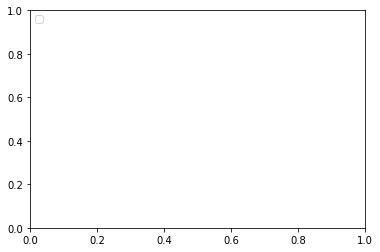

In [4]:
plt.legend(loc=2)
plt.show()

In [81]:
data=pd.read_csv('taxi_bike_walking1.csv')
data=data.set_index(['PULocationID','DOLocationID'])
data1=data[(data.duration<20000)&(data.bikeduration<20000)]

In [82]:
#data1=[x for x in data if x['duration']<20000]

In [83]:
x=np.array(data1['duration'])
y=np.array(data1['bikeduration'])
#z=np.array(x,y)

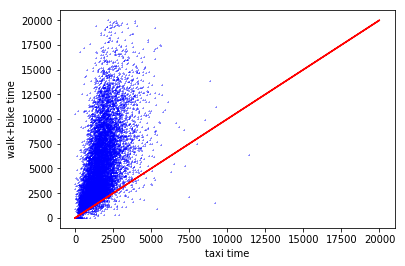

In [84]:
s=1
plt.scatter(x, y, s, c="b", alpha=0.5, marker='+')
plt.plot(y,y,c='r')
plt.xlabel('taxi time')
plt.ylabel('walk+bike time')
plt.savefig('result.png')

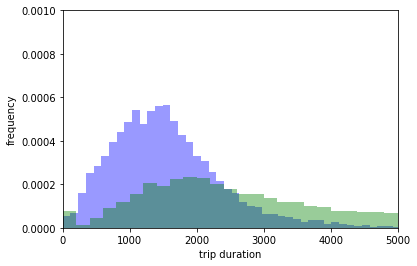

In [108]:
n, bins, patches=plt.hist(x, 100, density=True, facecolor='b', alpha=0.4)
n, bins, patches=plt.hist(y, 100, density=True, facecolor='g', alpha=0.4)
plt.axis([0, 5000, 0, 0.001])
plt.xlabel('trip duration')
plt.ylabel('frequency')
plt.savefig('frequency.png')

In [148]:
data2=pd.DataFrame(columns = ['taxi time','proportion'])
for i in range(100):
    temp=data1[(data1.duration>100*i)&(data1.duration<100*i+100)]
    temp1=temp[temp.duration<temp.bikeduration]
    (x1,y1)=temp.shape
    (x2,y2)=temp1.shape
    proportion=x2/(x1)
    print(proportion)
    data2=data2.append({'taxi time': 100*i+100,'proportion': proportion},ignore_index=True)

0.14634146341463414
0.3614457831325301
0.6145833333333334
0.9056603773584906
0.943069306930693
0.9723502304147466
0.974308300395257
0.984641638225256
0.9904458598726115
0.9851351351351352
0.9863201094391245
0.984313725490196
0.9820193637621023
0.9781287970838396
0.9842041312272175
0.9828850855745721
0.9861878453038674
0.9782270606531882
0.9722675367047309
0.9752851711026616
0.9834368530020704
0.9716981132075472
0.9594594594594594
0.9903536977491961
0.9890909090909091
0.9824561403508771
0.9631578947368421
0.9720670391061452
0.9779411764705882
0.9767441860465116
0.9789473684210527
0.9659090909090909
0.9647058823529412
0.9473684210526315
0.9836065573770492
0.9807692307692307
0.9534883720930233
0.9
0.96
0.9615384615384616
0.9142857142857143
0.9565217391304348
0.9047619047619048
1.0
0.8823529411764706
0.8461538461538461
0.8571428571428571
1.0
1.0
1.0
0.5
1.0
0.8333333333333334
1.0
0.0
1.0
0.75
1.0


ZeroDivisionError: division by zero

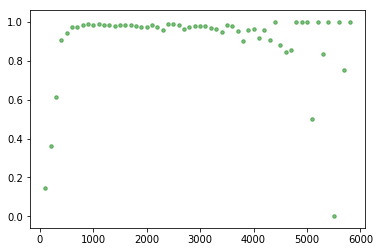

In [149]:
tt=np.array(data2['taxi time'])
pp=np.array(data2['proportion'])
plt.scatter(tt,pp, s, c="g", alpha=0.5, marker='.')

C:\Users\liumo15\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


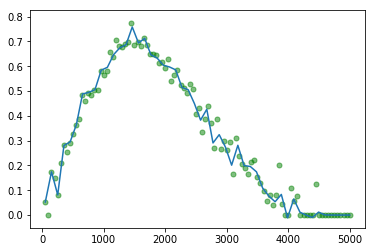

In [86]:
from scipy.interpolate import spline
xnew = np.linspace(tt.min(),tt.max(),50)
power_smooth = spline(tt,pp,xnew)
s=100
plt.scatter(tt,pp, s, c="g", alpha=0.5, marker='.')
plt.plot(xnew,power_smooth)

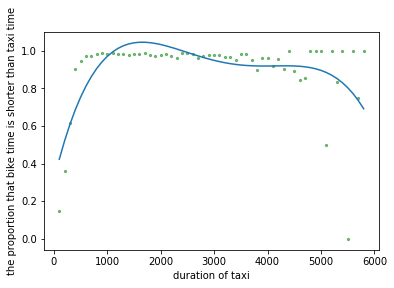

In [140]:
poly_deg = 4
coefs = np.polyfit(tt, pp, poly_deg)
y_poly = np.polyval(coefs, tt)
plt.scatter(tt,pp, s, c="g", alpha=0.5, marker='.')
plt.plot(tt,y_poly)
plt.xlabel('duration of taxi')
plt.ylabel('the proportion that bike time is shorter than taxi time')
plt.savefig('proportion')

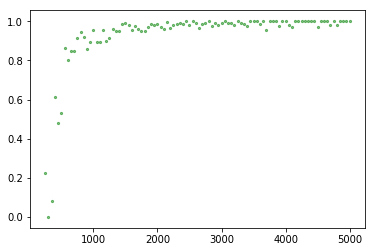

In [141]:
data3=pd.DataFrame(columns = ['bike time','proportion'])
for i in range(100):
    temp=data1[(data1.bikeduration>50*i)&(data1.bikeduration<50*i+50)]
    temp1=temp[temp.duration<temp.bikeduration]
    (x1,y1)=temp.shape
    (x2,y2)=temp1.shape
    if x1!=0 :
        proportion=x2/x1
        data3=data3.append({'bike time': 50*i+50,'proportion': proportion},ignore_index=True)
bt=np.array(data3['bike time'])
bp=np.array(data3['proportion'])
plt.scatter(bt,bp, s, c="g", alpha=0.5, marker='.')



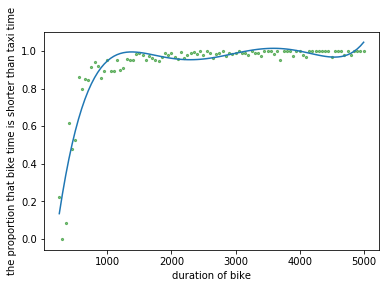

In [115]:
poly_deg = 5
coefs = np.polyfit(bt, bp, poly_deg)
y_poly = np.polyval(coefs, bt)
plt.scatter(bt,bp, s, c="g", alpha=0.5, marker='.')
plt.plot(bt,y_poly)
plt.xlabel('duration of bike')
plt.ylabel('the proportion that bike time is shorter than taxi time')
plt.savefig('proportion_bike')

In [5]:
import pandas as pd
multimodaltime=pd.read_csv('multi-mode-time.csv',header=None)
multimodaltime=pd.DataFrame(multimodaltime.values,columns=['PUloc','DOloc','mduration'])
multimodaltime=multimodaltime.set_index(['PUloc','DOloc'])
data=pd.read_csv('rush_median.csv')
data=data.set_index(['PULocationID','DOLocationID'])
for (i,j) in  data.index :
    try:
        data.loc[(i,j),'mduration']=multimodaltime.loc[(i,j),'mduration']
    except:
        {}
    
    

In [63]:
wo=pd.read_csv('multimodal_without_round1.csv')
wo=wo.set_index(['PUloc','DOloc'])
data_wo=pd.DataFrame()
for (i,j) in wo.index:
    
    try:
        data_wo=data_wo.append(data.loc[i,j])
    except:
        {}
        

Text(0.5,1,'trips_in_rush_hours')

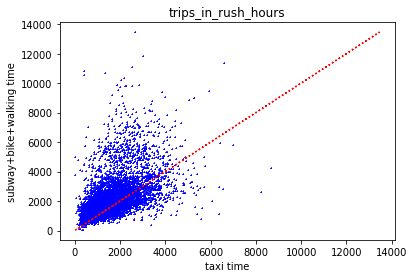

In [43]:
'''
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd
'''

data_wo=data_wo[(data_wo.mduration<20000)&(data_wo.duration<20000)]

x=np.array(data_wo['duration'])
y=np.array(data_wo['mduration'])
z=np.multiply(y,1.1)    
s=1
plt.scatter(x, y, s, c="b", alpha=1, marker='+')
#plt.plot(y,z,c='r',linestyle=':')
plt.plot(y,y,c='r',linestyle=':')
plt.xlabel('taxi time')
plt.ylabel('subway+bike+walking time')
plt.title('trips_in_rush_hours')
#plt.savefig('trips_betweeen_7am_and_10pm')

In [6]:
multimodaltime

mduration
PUloc DOloc           
1.0   1.0          0.0
      50.0     24201.0
      125.0    24092.0
      138.0    27417.0
      233.0    24567.0
      256.0    23187.0
      265.0    24386.0
3.0   18.0      3345.0
      254.0     1485.0
4.0   4.0          0.0
      7.0       2404.0
      12.0      1442.0
      13.0      1578.0
      14.0      3077.0
      17.0      2362.0
      21.0      2851.5
      22.0      2950.5
      24.0      1747.0
      25.0      1560.0
      29.0      3067.5
      33.0      1630.0
      34.0      1887.0
      36.0      2244.0
      37.0      1878.0
      40.0      1653.0
      41.0      2123.0
      42.0      2015.0
      43.0      1934.0
      45.0      1087.0
      48.0       916.0
...                ...
263.0 262.0      969.0
      263.0        0.0
      265.0     1738.0
264.0 264.0        0.0
265.0 1.0      24446.0
      5.0       5487.0
      10.0      5795.0
      48.0      1192.0
      89.0      2328.0
      92.0      3291.0
      100.0      794.0
      101.0     8227.0
      113.0      408.0
      130.0     3787.0
      135.0     4940.0
      138.0     5219.0
      140.0     1553.0
      141.0     1553.0
      161.0     1090.0
      164.0      946.0
      170.0     1368.0
      180.0     2518.0
      186.0     1114.0
      216.0     4279.0
      230.0     1083.0
      231.0      975.0
      240.0     4254.0
      244.0     1900.0
      257.0     2503.0
      265.0        0.0

[15127 rows x 1 columns]

In [ ]:
'''
import pandas as pd
multimodaltime=pd.read_csv('multi-mode-time.csv',header=None)
multimodaltime=pd.DataFrame(multimodaltime.values,columns=['PUloc','DOloc','mduration'])
multimodaltime=multimodaltime.set_index(['PUloc','DOloc'])
data=pd.read_csv('rush_median.csv')
data=data.set_index(['PULocationID','DOLocationID'])
for (i,j) in  data.index :
    try:
        data.loc[(i,j),'mduration']=multimodaltime.loc[(i,j),'mduration']
    except:
        {}
    
'''    

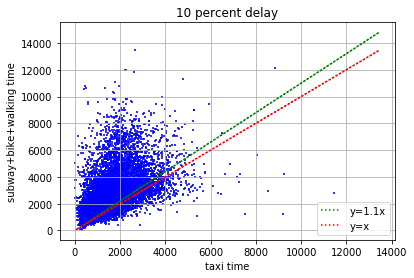

In [4]:
multimodaltime=pd.read_csv('multimodal_without_round1.csv')
multimodaltime=multimodaltime.set_index(['PUloc','DOloc'])
multimodaltime1=multimodaltime[(multimodaltime.taxitime<20000)&(multimodaltime.mduration<20000)]

x=np.array(multimodaltime1['taxitime'])
y=np.array(multimodaltime1['mduration'])
z=np.multiply(y,1.1)    
s=7
plt.scatter(x, y, s, c="b", alpha=0.8, marker='+')
plt.plot(y,z,c='g',linestyle=':',label='y=1.1x')
plt.plot(y,y,c='r',linestyle=':',label='y=x')
plt.xlabel('taxi time')
plt.grid()
plt.legend(loc='best')
plt.ylabel('subway+bike+walking time')
plt.title('10 percent delay')
plt.savefig('10 percent delay',dpi=1000)

In [1]:
import pandas as pd
import matplotlib as plt
multimodal_without_round=pd.read_csv('multi-mode-time.csv',header=None)
multimodal_without_round=pd.DataFrame(multimodal_without_round.values,columns=['PUloc','DOloc','mduration'])
multimodal_without_round=multimodal_without_round.set_index(['PUloc','DOloc'])
data=pd.read_csv('taxi_bike_walking1.csv')
data=data.set_index(['PULocationID','DOLocationID'])
for (i,j) in  multimodal_without_round.index :
    multimodal_without_round.loc[(i,j),'taxitime']=data.loc[(i,j),'duration']

In [3]:
multimodal_without_round

mduration     taxitime
PUloc DOloc                        
1.0   1.0          0.0    28.500000
      50.0     24201.0  5282.000000
      125.0    24092.0  2123.000000
      138.0    27417.0  4449.000000
      233.0    24567.0  3910.000000
      256.0    23187.0  2504.000000
      265.0    24386.0  1734.000000
3.0   18.0      3345.0  1726.000000
      254.0     1485.0   328.000000
4.0   4.0          0.0   151.000000
      7.0       2404.0  1423.000000
      12.0      1442.0   529.000000
      13.0      1578.0   749.000000
      14.0      3077.0  2268.000000
      17.0      2362.0  1282.000000
      21.0      2851.5  1373.000000
      22.0      2950.5  2324.000000
      24.0      1747.0  2585.000000
      25.0      1560.0  1198.500000
      29.0      3067.5  3061.000000
      33.0      1630.0  1014.000000
      34.0      1887.0  1142.000000
      36.0      2244.0  1477.000000
      37.0      1878.0  1479.000000
      40.0      1653.0  1332.000000
      41.0      2123.0  1483.000000
      42.0      2015.0  1273.000000
      43.0      1934.0  1344.000000
      45.0      1087.0   544.000000
      48.0       916.0  1275.500000
...                ...          ...
263.0 262.0      969.0   263.000000
      263.0        0.0   180.500000
      265.0     1738.0  1469.000000
264.0 264.0        0.0   674.000000
265.0 1.0      24446.0   596.000000
      5.0       5487.0  1914.000000
      10.0      5795.0   771.000000
      48.0      1192.0   755.000000
      89.0      2328.0  2971.000000
      92.0      3291.0  3089.000000
      100.0      794.0  1675.000000
      101.0     8227.0   989.499999
      113.0      408.0   831.000000
      130.0     3787.0  1512.500000
      135.0     4940.0  1938.500000
      138.0     5219.0  4126.000000
      140.0     1553.0  3794.000000
      141.0     1553.0  1766.000000
      161.0     1090.0  1794.000000
      164.0      946.0   549.000000
      170.0     1368.0   172.000000
      180.0     2518.0  1095.000000
      186.0     1114.0  5415.000000
      216.0     4279.0  2750.000000
      230.0     1083.0  1736.000000
      231.0      975.0   664.000000
      240.0     4254.0   178.000000
      244.0     1900.0  2398.000000
      257.0     2503.0  2184.000000
      265.0        0.0    38.000000

[15127 rows x 2 columns]

In [28]:
multimodal_without_round1=pd.DataFrame()
for (i,j) in multimodal_without_round.index:
    if i!= j:
        print(str(i)+':'+str(j))
        multimodal_without_round1=multimodal_without_round1.append(multimodal_without_round.loc[i,j])

1.0:50.0
1.0:125.0
1.0:138.0
1.0:233.0
1.0:256.0
1.0:265.0
3.0:18.0
3.0:254.0
4.0:7.0
4.0:12.0
4.0:13.0
4.0:14.0
4.0:17.0
4.0:21.0
4.0:22.0
4.0:24.0
4.0:25.0
4.0:29.0
4.0:33.0
4.0:34.0
4.0:36.0
4.0:37.0
4.0:40.0
4.0:41.0
4.0:42.0
4.0:43.0
4.0:45.0
4.0:48.0
4.0:49.0
4.0:50.0
4.0:52.0
4.0:54.0
4.0:56.0
4.0:60.0
4.0:61.0
4.0:62.0
4.0:63.0
4.0:65.0
4.0:66.0
4.0:67.0
4.0:68.0
4.0:69.0
4.0:70.0
4.0:74.0
4.0:75.0
4.0:76.0
4.0:77.0
4.0:79.0
4.0:80.0
4.0:83.0
4.0:87.0
4.0:88.0
4.0:89.0
4.0:90.0
4.0:95.0
4.0:97.0
4.0:100.0
4.0:102.0
4.0:106.0
4.0:107.0
4.0:112.0
4.0:113.0
4.0:114.0
4.0:116.0
4.0:123.0
4.0:125.0
4.0:127.0
4.0:129.0
4.0:133.0
4.0:135.0
4.0:137.0
4.0:138.0
4.0:140.0
4.0:141.0
4.0:142.0
4.0:143.0
4.0:144.0
4.0:145.0
4.0:146.0
4.0:147.0
4.0:148.0
4.0:149.0
4.0:151.0
4.0:152.0
4.0:158.0
4.0:159.0
4.0:161.0
4.0:162.0
4.0:163.0
4.0:164.0
4.0:166.0
4.0:168.0
4.0:169.0
4.0:170.0
4.0:174.0
4.0:177.0
4.0:179.0
4.0:181.0
4.0:182.0
4.0:186.0
4.0:188.0
4.0:189.0
4.0:190.0
4.0:193.0
4.0:195.0
4

25.0:163.0
25.0:164.0
25.0:166.0
25.0:168.0
25.0:170.0
25.0:173.0
25.0:177.0
25.0:181.0
25.0:182.0
25.0:186.0
25.0:188.0
25.0:189.0
25.0:190.0
25.0:192.0
25.0:195.0
25.0:196.0
25.0:197.0
25.0:198.0
25.0:200.0
25.0:209.0
25.0:211.0
25.0:217.0
25.0:224.0
25.0:225.0
25.0:226.0
25.0:227.0
25.0:228.0
25.0:229.0
25.0:230.0
25.0:231.0
25.0:232.0
25.0:233.0
25.0:234.0
25.0:235.0
25.0:236.0
25.0:237.0
25.0:239.0
25.0:246.0
25.0:248.0
25.0:249.0
25.0:255.0
25.0:256.0
25.0:257.0
25.0:258.0
25.0:261.0
25.0:262.0
25.0:263.0
26.0:11.0
26.0:22.0
26.0:29.0
26.0:67.0
26.0:162.0
26.0:210.0
26.0:227.0
26.0:265.0
28.0:42.0
28.0:45.0
28.0:48.0
28.0:56.0
28.0:73.0
28.0:75.0
28.0:87.0
28.0:92.0
28.0:93.0
28.0:95.0
28.0:100.0
28.0:107.0
28.0:116.0
28.0:121.0
28.0:134.0
28.0:138.0
28.0:161.0
28.0:162.0
28.0:163.0
28.0:164.0
28.0:170.0
28.0:173.0
28.0:180.0
28.0:186.0
28.0:191.0
28.0:197.0
28.0:211.0
28.0:216.0
28.0:226.0
28.0:230.0
28.0:237.0
28.0:238.0
28.0:239.0
28.0:246.0
28.0:249.0
28.0:258.0
28.0:261.0
28

43.0:42.0
43.0:45.0
43.0:48.0
43.0:49.0
43.0:50.0
43.0:51.0
43.0:52.0
43.0:61.0
43.0:62.0
43.0:65.0
43.0:66.0
43.0:68.0
43.0:69.0
43.0:74.0
43.0:75.0
43.0:76.0
43.0:78.0
43.0:79.0
43.0:80.0
43.0:82.0
43.0:83.0
43.0:87.0
43.0:88.0
43.0:89.0
43.0:90.0
43.0:92.0
43.0:93.0
43.0:95.0
43.0:97.0
43.0:100.0
43.0:106.0
43.0:107.0
43.0:112.0
43.0:113.0
43.0:114.0
43.0:116.0
43.0:119.0
43.0:120.0
43.0:122.0
43.0:123.0
43.0:125.0
43.0:126.0
43.0:127.0
43.0:129.0
43.0:130.0
43.0:134.0
43.0:137.0
43.0:138.0
43.0:140.0
43.0:141.0
43.0:142.0
43.0:143.0
43.0:144.0
43.0:145.0
43.0:146.0
43.0:148.0
43.0:151.0
43.0:152.0
43.0:157.0
43.0:158.0
43.0:159.0
43.0:160.0
43.0:161.0
43.0:162.0
43.0:163.0
43.0:164.0
43.0:165.0
43.0:166.0
43.0:168.0
43.0:170.0
43.0:171.0
43.0:173.0
43.0:179.0
43.0:181.0
43.0:183.0
43.0:186.0
43.0:190.0
43.0:193.0
43.0:194.0
43.0:195.0
43.0:197.0
43.0:198.0
43.0:200.0
43.0:202.0
43.0:209.0
43.0:211.0
43.0:213.0
43.0:214.0
43.0:216.0
43.0:220.0
43.0:223.0
43.0:224.0
43.0:225.0
43.0:2

52.0:188.0
52.0:189.0
52.0:190.0
52.0:195.0
52.0:197.0
52.0:198.0
52.0:209.0
52.0:224.0
52.0:225.0
52.0:228.0
52.0:229.0
52.0:230.0
52.0:231.0
52.0:232.0
52.0:233.0
52.0:234.0
52.0:236.0
52.0:237.0
52.0:238.0
52.0:239.0
52.0:246.0
52.0:249.0
52.0:255.0
52.0:256.0
52.0:257.0
52.0:261.0
52.0:262.0
52.0:263.0
53.0:92.0
53.0:138.0
53.0:163.0
53.0:192.0
53.0:223.0
53.0:231.0
53.0:252.0
54.0:13.0
54.0:22.0
54.0:25.0
54.0:33.0
54.0:35.0
54.0:40.0
54.0:52.0
54.0:65.0
54.0:66.0
54.0:67.0
54.0:79.0
54.0:89.0
54.0:90.0
54.0:97.0
54.0:114.0
54.0:133.0
54.0:140.0
54.0:145.0
54.0:162.0
54.0:164.0
54.0:181.0
54.0:188.0
54.0:189.0
54.0:190.0
54.0:195.0
54.0:223.0
54.0:227.0
54.0:228.0
54.0:231.0
54.0:233.0
54.0:255.0
54.0:261.0
55.0:1.0
55.0:21.0
55.0:33.0
56.0:7.0
56.0:38.0
56.0:42.0
56.0:48.0
56.0:70.0
56.0:82.0
56.0:93.0
56.0:107.0
56.0:129.0
56.0:130.0
56.0:157.0
56.0:161.0
56.0:163.0
56.0:170.0
56.0:173.0
56.0:192.0
56.0:196.0
56.0:233.0
56.0:265.0
57.0:83.0
57.0:173.0
60.0:20.0
60.0:51.0
60.0:75

74.0:152.0
74.0:158.0
74.0:159.0
74.0:161.0
74.0:162.0
74.0:163.0
74.0:164.0
74.0:166.0
74.0:167.0
74.0:168.0
74.0:169.0
74.0:170.0
74.0:173.0
74.0:174.0
74.0:175.0
74.0:177.0
74.0:179.0
74.0:181.0
74.0:182.0
74.0:183.0
74.0:185.0
74.0:186.0
74.0:189.0
74.0:193.0
74.0:194.0
74.0:196.0
74.0:197.0
74.0:198.0
74.0:202.0
74.0:208.0
74.0:209.0
74.0:211.0
74.0:212.0
74.0:213.0
74.0:215.0
74.0:216.0
74.0:217.0
74.0:220.0
74.0:223.0
74.0:224.0
74.0:226.0
74.0:227.0
74.0:228.0
74.0:229.0
74.0:230.0
74.0:231.0
74.0:232.0
74.0:233.0
74.0:234.0
74.0:235.0
74.0:236.0
74.0:237.0
74.0:238.0
74.0:239.0
74.0:241.0
74.0:242.0
74.0:243.0
74.0:244.0
74.0:246.0
74.0:247.0
74.0:248.0
74.0:249.0
74.0:250.0
74.0:252.0
74.0:254.0
74.0:255.0
74.0:256.0
74.0:260.0
74.0:261.0
74.0:262.0
74.0:263.0
74.0:265.0
75.0:1.0
75.0:4.0
75.0:7.0
75.0:9.0
75.0:10.0
75.0:12.0
75.0:13.0
75.0:17.0
75.0:18.0
75.0:20.0
75.0:21.0
75.0:24.0
75.0:25.0
75.0:28.0
75.0:29.0
75.0:31.0
75.0:32.0
75.0:33.0
75.0:35.0
75.0:36.0
75.0:41.0
75

87.0:149.0
87.0:151.0
87.0:152.0
87.0:155.0
87.0:157.0
87.0:158.0
87.0:160.0
87.0:161.0
87.0:162.0
87.0:163.0
87.0:164.0
87.0:165.0
87.0:166.0
87.0:168.0
87.0:170.0
87.0:173.0
87.0:175.0
87.0:177.0
87.0:178.0
87.0:179.0
87.0:181.0
87.0:183.0
87.0:185.0
87.0:186.0
87.0:188.0
87.0:189.0
87.0:190.0
87.0:195.0
87.0:196.0
87.0:197.0
87.0:198.0
87.0:202.0
87.0:205.0
87.0:208.0
87.0:209.0
87.0:210.0
87.0:211.0
87.0:212.0
87.0:216.0
87.0:218.0
87.0:219.0
87.0:221.0
87.0:223.0
87.0:224.0
87.0:225.0
87.0:226.0
87.0:227.0
87.0:228.0
87.0:229.0
87.0:230.0
87.0:231.0
87.0:232.0
87.0:233.0
87.0:234.0
87.0:235.0
87.0:236.0
87.0:237.0
87.0:238.0
87.0:239.0
87.0:241.0
87.0:243.0
87.0:244.0
87.0:246.0
87.0:247.0
87.0:248.0
87.0:249.0
87.0:250.0
87.0:251.0
87.0:255.0
87.0:256.0
87.0:257.0
87.0:258.0
87.0:260.0
87.0:261.0
87.0:262.0
87.0:263.0
87.0:265.0
88.0:1.0
88.0:4.0
88.0:5.0
88.0:7.0
88.0:9.0
88.0:11.0
88.0:12.0
88.0:13.0
88.0:14.0
88.0:16.0
88.0:17.0
88.0:21.0
88.0:22.0
88.0:24.0
88.0:25.0
88.0:26.

100.0:58.0
100.0:60.0
100.0:61.0
100.0:62.0
100.0:64.0
100.0:65.0
100.0:66.0
100.0:67.0
100.0:68.0
100.0:69.0
100.0:70.0
100.0:71.0
100.0:72.0
100.0:73.0
100.0:74.0
100.0:75.0
100.0:76.0
100.0:77.0
100.0:78.0
100.0:79.0
100.0:80.0
100.0:81.0
100.0:82.0
100.0:83.0
100.0:85.0
100.0:87.0
100.0:88.0
100.0:89.0
100.0:90.0
100.0:91.0
100.0:92.0
100.0:93.0
100.0:94.0
100.0:95.0
100.0:97.0
100.0:98.0
100.0:102.0
100.0:106.0
100.0:107.0
100.0:108.0
100.0:112.0
100.0:113.0
100.0:114.0
100.0:115.0
100.0:116.0
100.0:117.0
100.0:118.0
100.0:119.0
100.0:121.0
100.0:122.0
100.0:123.0
100.0:124.0
100.0:125.0
100.0:126.0
100.0:127.0
100.0:129.0
100.0:130.0
100.0:131.0
100.0:133.0
100.0:134.0
100.0:135.0
100.0:136.0
100.0:137.0
100.0:138.0
100.0:140.0
100.0:141.0
100.0:142.0
100.0:143.0
100.0:144.0
100.0:145.0
100.0:146.0
100.0:147.0
100.0:148.0
100.0:150.0
100.0:151.0
100.0:152.0
100.0:153.0
100.0:155.0
100.0:157.0
100.0:158.0
100.0:159.0
100.0:160.0
100.0:161.0
100.0:162.0
100.0:163.0
100.0:164.0
100.

114.0:29.0
114.0:32.0
114.0:33.0
114.0:34.0
114.0:36.0
114.0:37.0
114.0:39.0
114.0:40.0
114.0:41.0
114.0:42.0
114.0:43.0
114.0:45.0
114.0:46.0
114.0:47.0
114.0:48.0
114.0:49.0
114.0:50.0
114.0:52.0
114.0:53.0
114.0:54.0
114.0:55.0
114.0:56.0
114.0:61.0
114.0:62.0
114.0:63.0
114.0:65.0
114.0:66.0
114.0:67.0
114.0:68.0
114.0:69.0
114.0:70.0
114.0:71.0
114.0:72.0
114.0:74.0
114.0:75.0
114.0:76.0
114.0:78.0
114.0:79.0
114.0:80.0
114.0:82.0
114.0:83.0
114.0:85.0
114.0:87.0
114.0:88.0
114.0:89.0
114.0:90.0
114.0:91.0
114.0:92.0
114.0:93.0
114.0:94.0
114.0:95.0
114.0:96.0
114.0:97.0
114.0:100.0
114.0:102.0
114.0:106.0
114.0:107.0
114.0:112.0
114.0:113.0
114.0:116.0
114.0:119.0
114.0:122.0
114.0:123.0
114.0:124.0
114.0:125.0
114.0:127.0
114.0:129.0
114.0:131.0
114.0:133.0
114.0:134.0
114.0:135.0
114.0:136.0
114.0:137.0
114.0:138.0
114.0:140.0
114.0:141.0
114.0:142.0
114.0:143.0
114.0:144.0
114.0:145.0
114.0:146.0
114.0:148.0
114.0:149.0
114.0:150.0
114.0:151.0
114.0:152.0
114.0:157.0
114.0:158

137.0:67.0
137.0:68.0
137.0:69.0
137.0:70.0
137.0:72.0
137.0:74.0
137.0:75.0
137.0:76.0
137.0:78.0
137.0:79.0
137.0:80.0
137.0:82.0
137.0:83.0
137.0:85.0
137.0:86.0
137.0:87.0
137.0:88.0
137.0:89.0
137.0:90.0
137.0:91.0
137.0:92.0
137.0:93.0
137.0:94.0
137.0:95.0
137.0:97.0
137.0:98.0
137.0:100.0
137.0:102.0
137.0:106.0
137.0:107.0
137.0:112.0
137.0:113.0
137.0:114.0
137.0:116.0
137.0:118.0
137.0:119.0
137.0:121.0
137.0:123.0
137.0:125.0
137.0:126.0
137.0:127.0
137.0:128.0
137.0:129.0
137.0:130.0
137.0:131.0
137.0:133.0
137.0:134.0
137.0:136.0
137.0:138.0
137.0:140.0
137.0:141.0
137.0:142.0
137.0:143.0
137.0:144.0
137.0:145.0
137.0:146.0
137.0:147.0
137.0:148.0
137.0:149.0
137.0:151.0
137.0:152.0
137.0:155.0
137.0:157.0
137.0:158.0
137.0:159.0
137.0:160.0
137.0:161.0
137.0:162.0
137.0:163.0
137.0:164.0
137.0:165.0
137.0:166.0
137.0:167.0
137.0:168.0
137.0:169.0
137.0:170.0
137.0:171.0
137.0:173.0
137.0:174.0
137.0:177.0
137.0:178.0
137.0:179.0
137.0:180.0
137.0:181.0
137.0:182.0
137.0:

141.0:224.0
141.0:225.0
141.0:226.0
141.0:228.0
141.0:229.0
141.0:230.0
141.0:231.0
141.0:232.0
141.0:233.0
141.0:234.0
141.0:235.0
141.0:236.0
141.0:237.0
141.0:238.0
141.0:239.0
141.0:240.0
141.0:241.0
141.0:243.0
141.0:244.0
141.0:246.0
141.0:247.0
141.0:248.0
141.0:249.0
141.0:250.0
141.0:252.0
141.0:254.0
141.0:255.0
141.0:256.0
141.0:257.0
141.0:258.0
141.0:259.0
141.0:260.0
141.0:261.0
141.0:262.0
141.0:263.0
141.0:265.0
142.0:1.0
142.0:4.0
142.0:7.0
142.0:12.0
142.0:13.0
142.0:14.0
142.0:16.0
142.0:17.0
142.0:18.0
142.0:20.0
142.0:21.0
142.0:24.0
142.0:25.0
142.0:28.0
142.0:29.0
142.0:31.0
142.0:32.0
142.0:33.0
142.0:35.0
142.0:36.0
142.0:37.0
142.0:40.0
142.0:41.0
142.0:42.0
142.0:43.0
142.0:45.0
142.0:47.0
142.0:48.0
142.0:49.0
142.0:50.0
142.0:51.0
142.0:52.0
142.0:54.0
142.0:55.0
142.0:56.0
142.0:58.0
142.0:61.0
142.0:62.0
142.0:63.0
142.0:64.0
142.0:65.0
142.0:66.0
142.0:68.0
142.0:69.0
142.0:70.0
142.0:74.0
142.0:75.0
142.0:76.0
142.0:78.0
142.0:79.0
142.0:80.0
142.0:81.0

146.0:131.0
146.0:134.0
146.0:135.0
146.0:137.0
146.0:138.0
146.0:140.0
146.0:141.0
146.0:142.0
146.0:143.0
146.0:144.0
146.0:145.0
146.0:148.0
146.0:151.0
146.0:158.0
146.0:159.0
146.0:161.0
146.0:162.0
146.0:163.0
146.0:164.0
146.0:166.0
146.0:168.0
146.0:170.0
146.0:173.0
146.0:177.0
146.0:179.0
146.0:186.0
146.0:188.0
146.0:193.0
146.0:194.0
146.0:196.0
146.0:202.0
146.0:209.0
146.0:215.0
146.0:223.0
146.0:225.0
146.0:226.0
146.0:229.0
146.0:230.0
146.0:231.0
146.0:232.0
146.0:233.0
146.0:234.0
146.0:236.0
146.0:237.0
146.0:238.0
146.0:239.0
146.0:242.0
146.0:243.0
146.0:244.0
146.0:246.0
146.0:247.0
146.0:249.0
146.0:255.0
146.0:256.0
146.0:257.0
146.0:258.0
146.0:260.0
146.0:261.0
146.0:262.0
146.0:263.0
146.0:265.0
147.0:42.0
147.0:60.0
147.0:126.0
147.0:146.0
147.0:167.0
147.0:169.0
147.0:208.0
148.0:1.0
148.0:3.0
148.0:4.0
148.0:6.0
148.0:7.0
148.0:9.0
148.0:10.0
148.0:11.0
148.0:12.0
148.0:13.0
148.0:14.0
148.0:15.0
148.0:16.0
148.0:17.0
148.0:20.0
148.0:21.0
148.0:22.0
148.0

158.0:255.0
158.0:256.0
158.0:257.0
158.0:258.0
158.0:259.0
158.0:260.0
158.0:261.0
158.0:262.0
158.0:263.0
158.0:265.0
159.0:18.0
159.0:24.0
159.0:41.0
159.0:42.0
159.0:47.0
159.0:49.0
159.0:69.0
159.0:74.0
159.0:75.0
159.0:78.0
159.0:116.0
159.0:119.0
159.0:126.0
159.0:127.0
159.0:138.0
159.0:140.0
159.0:147.0
159.0:151.0
159.0:153.0
159.0:161.0
159.0:163.0
159.0:166.0
159.0:167.0
159.0:168.0
159.0:174.0
159.0:181.0
159.0:182.0
159.0:208.0
159.0:211.0
159.0:230.0
159.0:240.0
159.0:244.0
159.0:247.0
159.0:259.0
160.0:36.0
160.0:63.0
160.0:82.0
160.0:102.0
160.0:134.0
160.0:193.0
160.0:258.0
161.0:1.0
161.0:3.0
161.0:4.0
161.0:7.0
161.0:9.0
161.0:10.0
161.0:12.0
161.0:13.0
161.0:14.0
161.0:15.0
161.0:17.0
161.0:18.0
161.0:20.0
161.0:21.0
161.0:22.0
161.0:24.0
161.0:25.0
161.0:26.0
161.0:28.0
161.0:29.0
161.0:31.0
161.0:32.0
161.0:33.0
161.0:34.0
161.0:35.0
161.0:36.0
161.0:37.0
161.0:40.0
161.0:41.0
161.0:42.0
161.0:43.0
161.0:45.0
161.0:47.0
161.0:48.0
161.0:49.0
161.0:50.0
161.0:52.0

164.0:100.0
164.0:102.0
164.0:106.0
164.0:107.0
164.0:108.0
164.0:112.0
164.0:113.0
164.0:114.0
164.0:116.0
164.0:117.0
164.0:119.0
164.0:121.0
164.0:123.0
164.0:125.0
164.0:126.0
164.0:127.0
164.0:128.0
164.0:129.0
164.0:130.0
164.0:131.0
164.0:133.0
164.0:134.0
164.0:135.0
164.0:136.0
164.0:137.0
164.0:138.0
164.0:139.0
164.0:140.0
164.0:141.0
164.0:142.0
164.0:143.0
164.0:144.0
164.0:145.0
164.0:146.0
164.0:147.0
164.0:148.0
164.0:149.0
164.0:150.0
164.0:151.0
164.0:152.0
164.0:156.0
164.0:157.0
164.0:158.0
164.0:159.0
164.0:160.0
164.0:161.0
164.0:162.0
164.0:163.0
164.0:165.0
164.0:166.0
164.0:167.0
164.0:168.0
164.0:169.0
164.0:170.0
164.0:171.0
164.0:173.0
164.0:175.0
164.0:177.0
164.0:179.0
164.0:181.0
164.0:182.0
164.0:183.0
164.0:185.0
164.0:186.0
164.0:188.0
164.0:189.0
164.0:190.0
164.0:191.0
164.0:193.0
164.0:194.0
164.0:195.0
164.0:196.0
164.0:197.0
164.0:198.0
164.0:202.0
164.0:203.0
164.0:208.0
164.0:209.0
164.0:211.0
164.0:213.0
164.0:215.0
164.0:216.0
164.0:217.0
164.

181.0:146.0
181.0:148.0
181.0:149.0
181.0:155.0
181.0:158.0
181.0:159.0
181.0:160.0
181.0:161.0
181.0:162.0
181.0:163.0
181.0:164.0
181.0:165.0
181.0:166.0
181.0:168.0
181.0:170.0
181.0:173.0
181.0:177.0
181.0:178.0
181.0:180.0
181.0:186.0
181.0:188.0
181.0:189.0
181.0:190.0
181.0:193.0
181.0:195.0
181.0:197.0
181.0:198.0
181.0:201.0
181.0:209.0
181.0:210.0
181.0:211.0
181.0:216.0
181.0:217.0
181.0:223.0
181.0:224.0
181.0:225.0
181.0:226.0
181.0:227.0
181.0:228.0
181.0:229.0
181.0:230.0
181.0:231.0
181.0:232.0
181.0:233.0
181.0:234.0
181.0:236.0
181.0:237.0
181.0:238.0
181.0:239.0
181.0:241.0
181.0:243.0
181.0:246.0
181.0:249.0
181.0:251.0
181.0:255.0
181.0:256.0
181.0:257.0
181.0:260.0
181.0:261.0
181.0:263.0
182.0:159.0
182.0:183.0
182.0:208.0
182.0:212.0
182.0:213.0
182.0:248.0
182.0:250.0
183.0:182.0
184.0:265.0
185.0:32.0
185.0:74.0
185.0:127.0
185.0:147.0
185.0:174.0
186.0:1.0
186.0:3.0
186.0:4.0
186.0:6.0
186.0:7.0
186.0:8.0
186.0:9.0
186.0:10.0
186.0:11.0
186.0:12.0
186.0:13.0


209.0:32.0
209.0:33.0
209.0:35.0
209.0:36.0
209.0:37.0
209.0:39.0
209.0:40.0
209.0:41.0
209.0:42.0
209.0:43.0
209.0:45.0
209.0:48.0
209.0:49.0
209.0:50.0
209.0:52.0
209.0:61.0
209.0:62.0
209.0:65.0
209.0:66.0
209.0:67.0
209.0:68.0
209.0:69.0
209.0:71.0
209.0:74.0
209.0:75.0
209.0:76.0
209.0:79.0
209.0:80.0
209.0:85.0
209.0:87.0
209.0:88.0
209.0:89.0
209.0:90.0
209.0:93.0
209.0:95.0
209.0:97.0
209.0:100.0
209.0:101.0
209.0:102.0
209.0:106.0
209.0:107.0
209.0:112.0
209.0:113.0
209.0:114.0
209.0:116.0
209.0:124.0
209.0:125.0
209.0:126.0
209.0:127.0
209.0:129.0
209.0:130.0
209.0:131.0
209.0:133.0
209.0:137.0
209.0:138.0
209.0:140.0
209.0:141.0
209.0:142.0
209.0:143.0
209.0:144.0
209.0:145.0
209.0:146.0
209.0:148.0
209.0:149.0
209.0:151.0
209.0:157.0
209.0:158.0
209.0:160.0
209.0:161.0
209.0:162.0
209.0:163.0
209.0:164.0
209.0:166.0
209.0:167.0
209.0:168.0
209.0:170.0
209.0:173.0
209.0:175.0
209.0:177.0
209.0:181.0
209.0:186.0
209.0:188.0
209.0:189.0
209.0:190.0
209.0:195.0
209.0:196.0
209.

226.0:88.0
226.0:90.0
226.0:93.0
226.0:95.0
226.0:96.0
226.0:97.0
226.0:98.0
226.0:100.0
226.0:101.0
226.0:102.0
226.0:106.0
226.0:107.0
226.0:112.0
226.0:113.0
226.0:114.0
226.0:116.0
226.0:119.0
226.0:125.0
226.0:129.0
226.0:133.0
226.0:134.0
226.0:136.0
226.0:137.0
226.0:138.0
226.0:139.0
226.0:140.0
226.0:141.0
226.0:142.0
226.0:143.0
226.0:144.0
226.0:145.0
226.0:146.0
226.0:148.0
226.0:151.0
226.0:157.0
226.0:158.0
226.0:160.0
226.0:161.0
226.0:162.0
226.0:163.0
226.0:164.0
226.0:165.0
226.0:166.0
226.0:167.0
226.0:168.0
226.0:170.0
226.0:171.0
226.0:172.0
226.0:173.0
226.0:175.0
226.0:179.0
226.0:180.0
226.0:181.0
226.0:182.0
226.0:183.0
226.0:186.0
226.0:188.0
226.0:189.0
226.0:192.0
226.0:193.0
226.0:194.0
226.0:196.0
226.0:197.0
226.0:198.0
226.0:200.0
226.0:202.0
226.0:209.0
226.0:210.0
226.0:211.0
226.0:216.0
226.0:217.0
226.0:219.0
226.0:220.0
226.0:223.0
226.0:224.0
226.0:225.0
226.0:229.0
226.0:230.0
226.0:231.0
226.0:232.0
226.0:233.0
226.0:234.0
226.0:236.0
226.0:237.0

232.0:42.0
232.0:43.0
232.0:45.0
232.0:48.0
232.0:49.0
232.0:50.0
232.0:51.0
232.0:52.0
232.0:54.0
232.0:56.0
232.0:60.0
232.0:61.0
232.0:62.0
232.0:63.0
232.0:65.0
232.0:66.0
232.0:67.0
232.0:68.0
232.0:69.0
232.0:70.0
232.0:72.0
232.0:74.0
232.0:75.0
232.0:76.0
232.0:78.0
232.0:79.0
232.0:80.0
232.0:83.0
232.0:85.0
232.0:87.0
232.0:88.0
232.0:89.0
232.0:90.0
232.0:95.0
232.0:97.0
232.0:100.0
232.0:106.0
232.0:107.0
232.0:108.0
232.0:112.0
232.0:113.0
232.0:114.0
232.0:116.0
232.0:119.0
232.0:122.0
232.0:123.0
232.0:125.0
232.0:129.0
232.0:130.0
232.0:131.0
232.0:133.0
232.0:134.0
232.0:135.0
232.0:137.0
232.0:138.0
232.0:140.0
232.0:141.0
232.0:142.0
232.0:143.0
232.0:144.0
232.0:145.0
232.0:146.0
232.0:148.0
232.0:151.0
232.0:152.0
232.0:157.0
232.0:158.0
232.0:159.0
232.0:160.0
232.0:161.0
232.0:162.0
232.0:163.0
232.0:164.0
232.0:166.0
232.0:168.0
232.0:170.0
232.0:173.0
232.0:177.0
232.0:179.0
232.0:180.0
232.0:181.0
232.0:182.0
232.0:186.0
232.0:188.0
232.0:189.0
232.0:190.0
232

237.0:51.0
237.0:52.0
237.0:53.0
237.0:54.0
237.0:55.0
237.0:56.0
237.0:60.0
237.0:61.0
237.0:62.0
237.0:63.0
237.0:65.0
237.0:66.0
237.0:67.0
237.0:68.0
237.0:69.0
237.0:70.0
237.0:71.0
237.0:72.0
237.0:74.0
237.0:75.0
237.0:78.0
237.0:79.0
237.0:80.0
237.0:81.0
237.0:82.0
237.0:83.0
237.0:87.0
237.0:88.0
237.0:89.0
237.0:90.0
237.0:92.0
237.0:93.0
237.0:94.0
237.0:95.0
237.0:97.0
237.0:98.0
237.0:100.0
237.0:102.0
237.0:106.0
237.0:107.0
237.0:108.0
237.0:112.0
237.0:113.0
237.0:114.0
237.0:116.0
237.0:118.0
237.0:119.0
237.0:121.0
237.0:122.0
237.0:123.0
237.0:125.0
237.0:126.0
237.0:127.0
237.0:128.0
237.0:129.0
237.0:130.0
237.0:131.0
237.0:133.0
237.0:134.0
237.0:135.0
237.0:136.0
237.0:137.0
237.0:138.0
237.0:139.0
237.0:140.0
237.0:141.0
237.0:142.0
237.0:143.0
237.0:144.0
237.0:145.0
237.0:146.0
237.0:147.0
237.0:148.0
237.0:149.0
237.0:151.0
237.0:152.0
237.0:155.0
237.0:157.0
237.0:158.0
237.0:159.0
237.0:160.0
237.0:161.0
237.0:162.0
237.0:163.0
237.0:164.0
237.0:165.0
237.

246.0:26.0
246.0:28.0
246.0:29.0
246.0:33.0
246.0:34.0
246.0:36.0
246.0:37.0
246.0:39.0
246.0:40.0
246.0:41.0
246.0:42.0
246.0:43.0
246.0:45.0
246.0:48.0
246.0:49.0
246.0:50.0
246.0:52.0
246.0:54.0
246.0:55.0
246.0:61.0
246.0:62.0
246.0:65.0
246.0:66.0
246.0:67.0
246.0:68.0
246.0:69.0
246.0:74.0
246.0:75.0
246.0:76.0
246.0:77.0
246.0:78.0
246.0:79.0
246.0:80.0
246.0:81.0
246.0:82.0
246.0:83.0
246.0:85.0
246.0:87.0
246.0:88.0
246.0:89.0
246.0:90.0
246.0:91.0
246.0:92.0
246.0:94.0
246.0:95.0
246.0:97.0
246.0:98.0
246.0:100.0
246.0:102.0
246.0:106.0
246.0:107.0
246.0:112.0
246.0:113.0
246.0:114.0
246.0:116.0
246.0:119.0
246.0:121.0
246.0:123.0
246.0:125.0
246.0:127.0
246.0:129.0
246.0:133.0
246.0:134.0
246.0:136.0
246.0:137.0
246.0:138.0
246.0:140.0
246.0:141.0
246.0:142.0
246.0:143.0
246.0:144.0
246.0:145.0
246.0:146.0
246.0:147.0
246.0:148.0
246.0:151.0
246.0:152.0
246.0:155.0
246.0:157.0
246.0:158.0
246.0:159.0
246.0:160.0
246.0:161.0
246.0:162.0
246.0:163.0
246.0:164.0
246.0:165.0
246

260.0:78.0
260.0:79.0
260.0:80.0
260.0:82.0
260.0:83.0
260.0:87.0
260.0:92.0
260.0:95.0
260.0:107.0
260.0:112.0
260.0:113.0
260.0:127.0
260.0:129.0
260.0:130.0
260.0:137.0
260.0:138.0
260.0:140.0
260.0:141.0
260.0:142.0
260.0:145.0
260.0:146.0
260.0:148.0
260.0:157.0
260.0:158.0
260.0:160.0
260.0:161.0
260.0:162.0
260.0:163.0
260.0:164.0
260.0:166.0
260.0:170.0
260.0:173.0
260.0:179.0
260.0:180.0
260.0:183.0
260.0:186.0
260.0:189.0
260.0:191.0
260.0:193.0
260.0:198.0
260.0:215.0
260.0:216.0
260.0:217.0
260.0:223.0
260.0:226.0
260.0:229.0
260.0:230.0
260.0:231.0
260.0:232.0
260.0:233.0
260.0:234.0
260.0:236.0
260.0:237.0
260.0:238.0
260.0:239.0
260.0:243.0
260.0:244.0
260.0:249.0
260.0:255.0
260.0:256.0
260.0:257.0
260.0:258.0
260.0:262.0
260.0:263.0
260.0:265.0
261.0:1.0
261.0:4.0
261.0:6.0
261.0:7.0
261.0:9.0
261.0:10.0
261.0:11.0
261.0:12.0
261.0:13.0
261.0:14.0
261.0:16.0
261.0:17.0
261.0:21.0
261.0:22.0
261.0:24.0
261.0:25.0
261.0:26.0
261.0:28.0
261.0:33.0
261.0:34.0
261.0:35.0
26

In [32]:
for (i,j) in multimodal_without_round1.index:
    print(str(i)+':'+str(j))
    multimodal_without_round1.loc[(i,j),'PUloc']=i
    multimodal_without_round1.loc[(i,j),'DOloc']=j

1.0:50.0
1.0:125.0
1.0:138.0
1.0:233.0
1.0:256.0
1.0:265.0
3.0:18.0
3.0:254.0
4.0:7.0
4.0:12.0
4.0:13.0
4.0:14.0
4.0:17.0
4.0:21.0
4.0:22.0
4.0:24.0
4.0:25.0
4.0:29.0
4.0:33.0
4.0:34.0
4.0:36.0
4.0:37.0
4.0:40.0
4.0:41.0
4.0:42.0
4.0:43.0
4.0:45.0
4.0:48.0
4.0:49.0
4.0:50.0
4.0:52.0
4.0:54.0
4.0:56.0
4.0:60.0
4.0:61.0
4.0:62.0
4.0:63.0
4.0:65.0
4.0:66.0
4.0:67.0
4.0:68.0
4.0:69.0
4.0:70.0
4.0:74.0
4.0:75.0
4.0:76.0
4.0:77.0
4.0:79.0
4.0:80.0
4.0:83.0
4.0:87.0
4.0:88.0
4.0:89.0
4.0:90.0
4.0:95.0
4.0:97.0
4.0:100.0
4.0:102.0
4.0:106.0
4.0:107.0
4.0:112.0
4.0:113.0
4.0:114.0
4.0:116.0
4.0:123.0
4.0:125.0
4.0:127.0
4.0:129.0
4.0:133.0
4.0:135.0
4.0:137.0
4.0:138.0
4.0:140.0
4.0:141.0
4.0:142.0
4.0:143.0
4.0:144.0
4.0:145.0
4.0:146.0
4.0:147.0
4.0:148.0
4.0:149.0
4.0:151.0
4.0:152.0
4.0:158.0
4.0:159.0
4.0:161.0
4.0:162.0
4.0:163.0
4.0:164.0
4.0:166.0
4.0:168.0
4.0:169.0
4.0:170.0
4.0:174.0
4.0:177.0
4.0:179.0
4.0:181.0
4.0:182.0
4.0:186.0
4.0:188.0
4.0:189.0
4.0:190.0
4.0:193.0
4.0:195.0
4

33.0:107.0
33.0:112.0
33.0:113.0
33.0:114.0
33.0:116.0
33.0:119.0
33.0:123.0
33.0:125.0
33.0:129.0
33.0:130.0
33.0:133.0
33.0:137.0
33.0:138.0
33.0:140.0
33.0:141.0
33.0:142.0
33.0:144.0
33.0:145.0
33.0:148.0
33.0:149.0
33.0:150.0
33.0:151.0
33.0:158.0
33.0:161.0
33.0:162.0
33.0:163.0
33.0:164.0
33.0:166.0
33.0:170.0
33.0:177.0
33.0:179.0
33.0:181.0
33.0:188.0
33.0:189.0
33.0:190.0
33.0:195.0
33.0:197.0
33.0:198.0
33.0:201.0
33.0:209.0
33.0:210.0
33.0:211.0
33.0:217.0
33.0:222.0
33.0:223.0
33.0:224.0
33.0:225.0
33.0:226.0
33.0:227.0
33.0:228.0
33.0:229.0
33.0:230.0
33.0:231.0
33.0:232.0
33.0:233.0
33.0:234.0
33.0:236.0
33.0:237.0
33.0:238.0
33.0:239.0
33.0:246.0
33.0:249.0
33.0:255.0
33.0:256.0
33.0:257.0
33.0:260.0
33.0:261.0
33.0:262.0
33.0:263.0
34.0:4.0
34.0:17.0
34.0:25.0
34.0:26.0
34.0:33.0
34.0:37.0
34.0:49.0
34.0:61.0
34.0:65.0
34.0:66.0
34.0:79.0
34.0:95.0
34.0:97.0
34.0:112.0
34.0:145.0
34.0:158.0
34.0:161.0
34.0:181.0
34.0:186.0
34.0:188.0
34.0:189.0
34.0:198.0
34.0:228.0
34

50.0:52.0
50.0:54.0
50.0:55.0
50.0:56.0
50.0:61.0
50.0:63.0
50.0:65.0
50.0:66.0
50.0:68.0
50.0:69.0
50.0:70.0
50.0:72.0
50.0:74.0
50.0:75.0
50.0:76.0
50.0:79.0
50.0:80.0
50.0:81.0
50.0:82.0
50.0:83.0
50.0:87.0
50.0:88.0
50.0:89.0
50.0:90.0
50.0:91.0
50.0:92.0
50.0:94.0
50.0:95.0
50.0:97.0
50.0:100.0
50.0:106.0
50.0:107.0
50.0:108.0
50.0:112.0
50.0:113.0
50.0:114.0
50.0:116.0
50.0:117.0
50.0:118.0
50.0:119.0
50.0:121.0
50.0:123.0
50.0:125.0
50.0:126.0
50.0:127.0
50.0:129.0
50.0:131.0
50.0:134.0
50.0:136.0
50.0:137.0
50.0:138.0
50.0:140.0
50.0:141.0
50.0:142.0
50.0:143.0
50.0:144.0
50.0:145.0
50.0:146.0
50.0:147.0
50.0:148.0
50.0:149.0
50.0:150.0
50.0:151.0
50.0:152.0
50.0:153.0
50.0:158.0
50.0:159.0
50.0:161.0
50.0:162.0
50.0:163.0
50.0:164.0
50.0:165.0
50.0:166.0
50.0:167.0
50.0:168.0
50.0:169.0
50.0:170.0
50.0:174.0
50.0:177.0
50.0:179.0
50.0:180.0
50.0:181.0
50.0:182.0
50.0:183.0
50.0:185.0
50.0:186.0
50.0:188.0
50.0:189.0
50.0:190.0
50.0:193.0
50.0:195.0
50.0:196.0
50.0:198.0
50.0:2

75.0:83.0
75.0:87.0
75.0:88.0
75.0:90.0
75.0:92.0
75.0:93.0
75.0:94.0
75.0:95.0
75.0:97.0
75.0:100.0
75.0:102.0
75.0:106.0
75.0:107.0
75.0:112.0
75.0:113.0
75.0:114.0
75.0:116.0
75.0:119.0
75.0:125.0
75.0:126.0
75.0:127.0
75.0:128.0
75.0:129.0
75.0:136.0
75.0:137.0
75.0:138.0
75.0:140.0
75.0:141.0
75.0:142.0
75.0:143.0
75.0:144.0
75.0:145.0
75.0:146.0
75.0:147.0
75.0:148.0
75.0:149.0
75.0:151.0
75.0:152.0
75.0:157.0
75.0:158.0
75.0:159.0
75.0:160.0
75.0:161.0
75.0:162.0
75.0:163.0
75.0:164.0
75.0:166.0
75.0:167.0
75.0:168.0
75.0:169.0
75.0:170.0
75.0:171.0
75.0:173.0
75.0:179.0
75.0:181.0
75.0:182.0
75.0:183.0
75.0:185.0
75.0:186.0
75.0:188.0
75.0:189.0
75.0:193.0
75.0:194.0
75.0:196.0
75.0:198.0
75.0:200.0
75.0:202.0
75.0:205.0
75.0:208.0
75.0:209.0
75.0:211.0
75.0:212.0
75.0:213.0
75.0:217.0
75.0:218.0
75.0:220.0
75.0:223.0
75.0:224.0
75.0:225.0
75.0:226.0
75.0:227.0
75.0:228.0
75.0:229.0
75.0:230.0
75.0:231.0
75.0:232.0
75.0:233.0
75.0:234.0
75.0:235.0
75.0:236.0
75.0:237.0
75.0:238

88.0:232.0
88.0:233.0
88.0:234.0
88.0:235.0
88.0:236.0
88.0:237.0
88.0:238.0
88.0:239.0
88.0:240.0
88.0:243.0
88.0:244.0
88.0:245.0
88.0:246.0
88.0:247.0
88.0:249.0
88.0:251.0
88.0:255.0
88.0:256.0
88.0:257.0
88.0:259.0
88.0:260.0
88.0:261.0
88.0:262.0
88.0:263.0
88.0:265.0
89.0:17.0
89.0:21.0
89.0:26.0
89.0:29.0
89.0:33.0
89.0:42.0
89.0:49.0
89.0:55.0
89.0:61.0
89.0:62.0
89.0:66.0
89.0:72.0
89.0:75.0
89.0:77.0
89.0:79.0
89.0:85.0
89.0:91.0
89.0:97.0
89.0:106.0
89.0:123.0
89.0:133.0
89.0:148.0
89.0:160.0
89.0:163.0
89.0:165.0
89.0:177.0
89.0:179.0
89.0:181.0
89.0:188.0
89.0:189.0
89.0:190.0
89.0:225.0
89.0:227.0
89.0:228.0
89.0:249.0
89.0:256.0
89.0:257.0
90.0:1.0
90.0:4.0
90.0:5.0
90.0:6.0
90.0:7.0
90.0:8.0
90.0:12.0
90.0:13.0
90.0:14.0
90.0:17.0
90.0:18.0
90.0:19.0
90.0:20.0
90.0:21.0
90.0:22.0
90.0:24.0
90.0:25.0
90.0:26.0
90.0:29.0
90.0:31.0
90.0:33.0
90.0:34.0
90.0:35.0
90.0:36.0
90.0:37.0
90.0:39.0
90.0:40.0
90.0:41.0
90.0:42.0
90.0:43.0
90.0:45.0
90.0:46.0
90.0:47.0
90.0:48.0
90

111.0:255.0
112.0:4.0
112.0:7.0
112.0:13.0
112.0:14.0
112.0:17.0
112.0:25.0
112.0:26.0
112.0:33.0
112.0:34.0
112.0:36.0
112.0:37.0
112.0:40.0
112.0:41.0
112.0:42.0
112.0:43.0
112.0:45.0
112.0:48.0
112.0:49.0
112.0:50.0
112.0:52.0
112.0:54.0
112.0:61.0
112.0:62.0
112.0:65.0
112.0:66.0
112.0:67.0
112.0:68.0
112.0:71.0
112.0:74.0
112.0:75.0
112.0:79.0
112.0:80.0
112.0:82.0
112.0:85.0
112.0:87.0
112.0:88.0
112.0:89.0
112.0:90.0
112.0:92.0
112.0:93.0
112.0:95.0
112.0:96.0
112.0:97.0
112.0:100.0
112.0:102.0
112.0:106.0
112.0:107.0
112.0:111.0
112.0:113.0
112.0:119.0
112.0:121.0
112.0:125.0
112.0:129.0
112.0:133.0
112.0:137.0
112.0:138.0
112.0:140.0
112.0:141.0
112.0:142.0
112.0:143.0
112.0:144.0
112.0:145.0
112.0:146.0
112.0:148.0
112.0:151.0
112.0:157.0
112.0:159.0
112.0:160.0
112.0:161.0
112.0:162.0
112.0:163.0
112.0:164.0
112.0:165.0
112.0:170.0
112.0:173.0
112.0:179.0
112.0:181.0
112.0:183.0
112.0:186.0
112.0:188.0
112.0:189.0
112.0:190.0
112.0:192.0
112.0:193.0
112.0:195.0
112.0:198.0
1

135.0:141.0
135.0:226.0
135.0:244.0
135.0:246.0
135.0:265.0
136.0:20.0
136.0:151.0
136.0:152.0
136.0:166.0
136.0:174.0
136.0:220.0
136.0:240.0
136.0:241.0
136.0:244.0
136.0:247.0
136.0:254.0
137.0:1.0
137.0:4.0
137.0:7.0
137.0:10.0
137.0:12.0
137.0:13.0
137.0:14.0
137.0:16.0
137.0:17.0
137.0:20.0
137.0:21.0
137.0:22.0
137.0:24.0
137.0:25.0
137.0:26.0
137.0:28.0
137.0:32.0
137.0:33.0
137.0:34.0
137.0:35.0
137.0:36.0
137.0:37.0
137.0:39.0
137.0:40.0
137.0:41.0
137.0:42.0
137.0:43.0
137.0:45.0
137.0:47.0
137.0:48.0
137.0:49.0
137.0:50.0
137.0:51.0
137.0:52.0
137.0:54.0
137.0:56.0
137.0:61.0
137.0:62.0
137.0:63.0
137.0:65.0
137.0:66.0
137.0:67.0
137.0:68.0
137.0:69.0
137.0:70.0
137.0:72.0
137.0:74.0
137.0:75.0
137.0:76.0
137.0:78.0
137.0:79.0
137.0:80.0
137.0:82.0
137.0:83.0
137.0:85.0
137.0:86.0
137.0:87.0
137.0:88.0
137.0:89.0
137.0:90.0
137.0:91.0
137.0:92.0
137.0:93.0
137.0:94.0
137.0:95.0
137.0:97.0
137.0:98.0
137.0:100.0
137.0:102.0
137.0:106.0
137.0:107.0
137.0:112.0
137.0:113.0
137

143.0:7.0
143.0:11.0
143.0:12.0
143.0:13.0
143.0:14.0
143.0:18.0
143.0:21.0
143.0:24.0
143.0:25.0
143.0:26.0
143.0:28.0
143.0:29.0
143.0:32.0
143.0:33.0
143.0:36.0
143.0:37.0
143.0:40.0
143.0:41.0
143.0:42.0
143.0:43.0
143.0:45.0
143.0:47.0
143.0:48.0
143.0:49.0
143.0:50.0
143.0:52.0
143.0:54.0
143.0:56.0
143.0:61.0
143.0:62.0
143.0:63.0
143.0:65.0
143.0:68.0
143.0:69.0
143.0:73.0
143.0:74.0
143.0:75.0
143.0:78.0
143.0:79.0
143.0:80.0
143.0:82.0
143.0:83.0
143.0:87.0
143.0:88.0
143.0:89.0
143.0:90.0
143.0:93.0
143.0:94.0
143.0:95.0
143.0:97.0
143.0:100.0
143.0:106.0
143.0:107.0
143.0:108.0
143.0:112.0
143.0:113.0
143.0:114.0
143.0:116.0
143.0:119.0
143.0:120.0
143.0:121.0
143.0:125.0
143.0:126.0
143.0:127.0
143.0:128.0
143.0:129.0
143.0:131.0
143.0:135.0
143.0:136.0
143.0:137.0
143.0:138.0
143.0:140.0
143.0:141.0
143.0:142.0
143.0:144.0
143.0:145.0
143.0:146.0
143.0:147.0
143.0:148.0
143.0:151.0
143.0:152.0
143.0:153.0
143.0:158.0
143.0:159.0
143.0:161.0
143.0:162.0
143.0:163.0
143.0:1

152.0:254.0
152.0:255.0
152.0:262.0
152.0:263.0
152.0:265.0
153.0:42.0
153.0:127.0
153.0:200.0
153.0:243.0
154.0:89.0
154.0:239.0
155.0:35.0
155.0:123.0
155.0:201.0
155.0:210.0
157.0:7.0
157.0:17.0
157.0:34.0
157.0:43.0
157.0:48.0
157.0:68.0
157.0:70.0
157.0:82.0
157.0:83.0
157.0:87.0
157.0:95.0
157.0:100.0
157.0:107.0
157.0:112.0
157.0:113.0
157.0:129.0
157.0:140.0
157.0:145.0
157.0:160.0
157.0:164.0
157.0:179.0
157.0:192.0
157.0:198.0
157.0:226.0
157.0:230.0
157.0:232.0
157.0:234.0
157.0:260.0
157.0:263.0
157.0:265.0
158.0:1.0
158.0:3.0
158.0:4.0
158.0:6.0
158.0:7.0
158.0:11.0
158.0:12.0
158.0:13.0
158.0:14.0
158.0:16.0
158.0:17.0
158.0:19.0
158.0:21.0
158.0:22.0
158.0:23.0
158.0:24.0
158.0:25.0
158.0:26.0
158.0:28.0
158.0:29.0
158.0:31.0
158.0:33.0
158.0:35.0
158.0:36.0
158.0:37.0
158.0:39.0
158.0:40.0
158.0:41.0
158.0:42.0
158.0:43.0
158.0:45.0
158.0:48.0
158.0:49.0
158.0:50.0
158.0:51.0
158.0:52.0
158.0:54.0
158.0:56.0
158.0:58.0
158.0:61.0
158.0:62.0
158.0:65.0
158.0:66.0
158.0:6

164.0:181.0
164.0:182.0
164.0:183.0
164.0:185.0
164.0:186.0
164.0:188.0
164.0:189.0
164.0:190.0
164.0:191.0
164.0:193.0
164.0:194.0
164.0:195.0
164.0:196.0
164.0:197.0
164.0:198.0
164.0:202.0
164.0:203.0
164.0:208.0
164.0:209.0
164.0:211.0
164.0:213.0
164.0:215.0
164.0:216.0
164.0:217.0
164.0:218.0
164.0:219.0
164.0:220.0
164.0:221.0
164.0:223.0
164.0:224.0
164.0:225.0
164.0:226.0
164.0:227.0
164.0:228.0
164.0:229.0
164.0:230.0
164.0:231.0
164.0:232.0
164.0:233.0
164.0:234.0
164.0:235.0
164.0:236.0
164.0:237.0
164.0:238.0
164.0:239.0
164.0:240.0
164.0:241.0
164.0:242.0
164.0:243.0
164.0:244.0
164.0:246.0
164.0:247.0
164.0:248.0
164.0:249.0
164.0:250.0
164.0:252.0
164.0:255.0
164.0:256.0
164.0:257.0
164.0:258.0
164.0:259.0
164.0:260.0
164.0:261.0
164.0:262.0
164.0:263.0
164.0:265.0
165.0:61.0
165.0:89.0
165.0:133.0
165.0:178.0
165.0:210.0
165.0:257.0
166.0:1.0
166.0:3.0
166.0:4.0
166.0:7.0
166.0:12.0
166.0:13.0
166.0:17.0
166.0:18.0
166.0:24.0
166.0:33.0
166.0:41.0
166.0:42.0
166.0:43.0

188.0:39.0
188.0:40.0
188.0:42.0
188.0:49.0
188.0:61.0
188.0:62.0
188.0:65.0
188.0:66.0
188.0:71.0
188.0:72.0
188.0:76.0
188.0:77.0
188.0:85.0
188.0:89.0
188.0:90.0
188.0:91.0
188.0:97.0
188.0:106.0
188.0:107.0
188.0:112.0
188.0:114.0
188.0:138.0
188.0:144.0
188.0:148.0
188.0:160.0
188.0:165.0
188.0:177.0
188.0:181.0
188.0:189.0
188.0:190.0
188.0:195.0
188.0:209.0
188.0:211.0
188.0:225.0
188.0:228.0
188.0:230.0
188.0:256.0
189.0:4.0
189.0:14.0
189.0:17.0
189.0:22.0
189.0:25.0
189.0:26.0
189.0:33.0
189.0:35.0
189.0:36.0
189.0:37.0
189.0:40.0
189.0:45.0
189.0:48.0
189.0:49.0
189.0:50.0
189.0:52.0
189.0:61.0
189.0:62.0
189.0:65.0
189.0:66.0
189.0:68.0
189.0:71.0
189.0:72.0
189.0:74.0
189.0:76.0
189.0:77.0
189.0:79.0
189.0:80.0
189.0:82.0
189.0:87.0
189.0:88.0
189.0:89.0
189.0:90.0
189.0:97.0
189.0:100.0
189.0:106.0
189.0:107.0
189.0:112.0
189.0:113.0
189.0:114.0
189.0:129.0
189.0:133.0
189.0:137.0
189.0:138.0
189.0:140.0
189.0:141.0
189.0:144.0
189.0:145.0
189.0:148.0
189.0:161.0
189.0:16

224.0:17.0
224.0:24.0
224.0:25.0
224.0:33.0
224.0:36.0
224.0:37.0
224.0:40.0
224.0:41.0
224.0:42.0
224.0:43.0
224.0:45.0
224.0:48.0
224.0:49.0
224.0:50.0
224.0:54.0
224.0:55.0
224.0:61.0
224.0:65.0
224.0:66.0
224.0:68.0
224.0:69.0
224.0:71.0
224.0:74.0
224.0:75.0
224.0:79.0
224.0:80.0
224.0:87.0
224.0:88.0
224.0:89.0
224.0:90.0
224.0:91.0
224.0:95.0
224.0:97.0
224.0:100.0
224.0:106.0
224.0:107.0
224.0:113.0
224.0:114.0
224.0:116.0
224.0:123.0
224.0:125.0
224.0:127.0
224.0:129.0
224.0:137.0
224.0:138.0
224.0:140.0
224.0:141.0
224.0:142.0
224.0:143.0
224.0:144.0
224.0:145.0
224.0:147.0
224.0:148.0
224.0:151.0
224.0:152.0
224.0:154.0
224.0:157.0
224.0:158.0
224.0:159.0
224.0:161.0
224.0:162.0
224.0:163.0
224.0:164.0
224.0:166.0
224.0:167.0
224.0:168.0
224.0:170.0
224.0:175.0
224.0:179.0
224.0:181.0
224.0:186.0
224.0:189.0
224.0:190.0
224.0:191.0
224.0:193.0
224.0:195.0
224.0:196.0
224.0:198.0
224.0:209.0
224.0:211.0
224.0:216.0
224.0:220.0
224.0:223.0
224.0:225.0
224.0:226.0
224.0:229.0
2

232.0:144.0
232.0:145.0
232.0:146.0
232.0:148.0
232.0:151.0
232.0:152.0
232.0:157.0
232.0:158.0
232.0:159.0
232.0:160.0
232.0:161.0
232.0:162.0
232.0:163.0
232.0:164.0
232.0:166.0
232.0:168.0
232.0:170.0
232.0:173.0
232.0:177.0
232.0:179.0
232.0:180.0
232.0:181.0
232.0:182.0
232.0:186.0
232.0:188.0
232.0:189.0
232.0:190.0
232.0:194.0
232.0:195.0
232.0:196.0
232.0:197.0
232.0:198.0
232.0:200.0
232.0:206.0
232.0:209.0
232.0:211.0
232.0:217.0
232.0:220.0
232.0:223.0
232.0:224.0
232.0:225.0
232.0:226.0
232.0:227.0
232.0:228.0
232.0:229.0
232.0:230.0
232.0:231.0
232.0:233.0
232.0:234.0
232.0:235.0
232.0:236.0
232.0:237.0
232.0:238.0
232.0:239.0
232.0:240.0
232.0:243.0
232.0:244.0
232.0:246.0
232.0:247.0
232.0:248.0
232.0:249.0
232.0:255.0
232.0:256.0
232.0:257.0
232.0:258.0
232.0:261.0
232.0:262.0
232.0:263.0
232.0:265.0
233.0:1.0
233.0:4.0
233.0:7.0
233.0:8.0
233.0:10.0
233.0:12.0
233.0:13.0
233.0:14.0
233.0:15.0
233.0:16.0
233.0:17.0
233.0:18.0
233.0:19.0
233.0:20.0
233.0:21.0
233.0:22.0


239.0:45.0
239.0:47.0
239.0:48.0
239.0:49.0
239.0:50.0
239.0:51.0
239.0:52.0
239.0:54.0
239.0:56.0
239.0:60.0
239.0:61.0
239.0:62.0
239.0:63.0
239.0:65.0
239.0:66.0
239.0:68.0
239.0:69.0
239.0:70.0
239.0:72.0
239.0:74.0
239.0:75.0
239.0:78.0
239.0:79.0
239.0:80.0
239.0:81.0
239.0:82.0
239.0:83.0
239.0:85.0
239.0:87.0
239.0:88.0
239.0:89.0
239.0:90.0
239.0:92.0
239.0:93.0
239.0:94.0
239.0:95.0
239.0:97.0
239.0:100.0
239.0:106.0
239.0:107.0
239.0:111.0
239.0:112.0
239.0:113.0
239.0:114.0
239.0:116.0
239.0:117.0
239.0:119.0
239.0:120.0
239.0:121.0
239.0:123.0
239.0:124.0
239.0:125.0
239.0:126.0
239.0:127.0
239.0:128.0
239.0:129.0
239.0:133.0
239.0:135.0
239.0:136.0
239.0:137.0
239.0:138.0
239.0:139.0
239.0:140.0
239.0:141.0
239.0:142.0
239.0:143.0
239.0:144.0
239.0:145.0
239.0:146.0
239.0:147.0
239.0:148.0
239.0:149.0
239.0:151.0
239.0:152.0
239.0:153.0
239.0:157.0
239.0:158.0
239.0:159.0
239.0:160.0
239.0:161.0
239.0:162.0
239.0:163.0
239.0:164.0
239.0:165.0
239.0:166.0
239.0:167.0
239.0

256.0:161.0
256.0:162.0
256.0:163.0
256.0:164.0
256.0:165.0
256.0:166.0
256.0:170.0
256.0:177.0
256.0:178.0
256.0:179.0
256.0:180.0
256.0:181.0
256.0:186.0
256.0:188.0
256.0:189.0
256.0:190.0
256.0:193.0
256.0:195.0
256.0:196.0
256.0:197.0
256.0:198.0
256.0:205.0
256.0:209.0
256.0:210.0
256.0:211.0
256.0:217.0
256.0:223.0
256.0:225.0
256.0:226.0
256.0:227.0
256.0:228.0
256.0:229.0
256.0:230.0
256.0:231.0
256.0:232.0
256.0:233.0
256.0:234.0
256.0:236.0
256.0:237.0
256.0:238.0
256.0:239.0
256.0:242.0
256.0:244.0
256.0:246.0
256.0:248.0
256.0:249.0
256.0:255.0
256.0:257.0
256.0:260.0
256.0:261.0
256.0:262.0
256.0:263.0
257.0:61.0
257.0:62.0
257.0:68.0
257.0:79.0
257.0:89.0
257.0:112.0
257.0:114.0
257.0:116.0
257.0:123.0
257.0:158.0
257.0:165.0
257.0:170.0
257.0:181.0
257.0:188.0
257.0:189.0
257.0:209.0
257.0:227.0
257.0:228.0
257.0:256.0
258.0:37.0
258.0:76.0
258.0:82.0
258.0:124.0
258.0:130.0
258.0:140.0
258.0:173.0
258.0:230.0
259.0:174.0
259.0:265.0
260.0:7.0
260.0:13.0
260.0:18.0
260.

In [38]:
#multimodal_without_round1=multimodal_without_round1.set_index(['PUloc','DOloc'])
multimodal_without_round1.to_csv('multimodal_without_round1.csv')
multimodal_without_round1

mduration     taxitime
PUloc DOloc                        
1.0   50.0     24201.0  5282.000000
      125.0    24092.0  2123.000000
      138.0    27417.0  4449.000000
      233.0    24567.0  3910.000000
      256.0    23187.0  2504.000000
      265.0    24386.0  1734.000000
3.0   18.0      3345.0  1726.000000
      254.0     1485.0   328.000000
4.0   7.0       2404.0  1423.000000
      12.0      1442.0   529.000000
      13.0      1578.0   749.000000
      14.0      3077.0  2268.000000
      17.0      2362.0  1282.000000
      21.0      2851.5  1373.000000
      22.0      2950.5  2324.000000
      24.0      1747.0  2585.000000
      25.0      1560.0  1198.500000
      29.0      3067.5  3061.000000
      33.0      1630.0  1014.000000
      34.0      1887.0  1142.000000
      36.0      2244.0  1477.000000
      37.0      1878.0  1479.000000
      40.0      1653.0  1332.000000
      41.0      2123.0  1483.000000
      42.0      2015.0  1273.000000
      43.0      1934.0  1344.000000
      45.0      1087.0   544.000000
      48.0       916.0  1275.500000
      49.0      1820.0  1371.000000
      50.0      1549.0  1452.000000
...                ...          ...
263.0 259.0     3330.0   973.000001
      260.0     1923.0  1082.000000
      261.0     2092.0  1171.000000
      262.0      969.0   263.000000
      265.0     1738.0  1469.000000
265.0 1.0      24446.0   596.000000
      5.0       5487.0  1914.000000
      10.0      5795.0   771.000000
      48.0      1192.0   755.000000
      89.0      2328.0  2971.000000
      92.0      3291.0  3089.000000
      100.0      794.0  1675.000000
      101.0     8227.0   989.499999
      113.0      408.0   831.000000
      130.0     3787.0  1512.500000
      135.0     4940.0  1938.500000
      138.0     5219.0  4126.000000
      140.0     1553.0  3794.000000
      141.0     1553.0  1766.000000
      161.0     1090.0  1794.000000
      164.0      946.0   549.000000
      170.0     1368.0   172.000000
      180.0     2518.0  1095.000000
      186.0     1114.0  5415.000000
      216.0     4279.0  2750.000000
      230.0     1083.0  1736.000000
      231.0      975.0   664.000000
      240.0     4254.0   178.000000
      244.0     1900.0  2398.000000
      257.0     2503.0  2184.000000

[14915 rows x 2 columns]

In [4]:
man=pd.read_csv('taxi _zone_lookup.csv')
man=man[man.Borough=='Manhattan']
manha=pd.DataFrame()
for i in man.LocationID:
    for j in man.LocationID:
        if i !=j:
            try: 
                manha=manha.append(multimodal_without_round.loc[i,j])
            except:
                print(str(i)+":"+str(j))

4:103
4:104
4:105
4:120
4:128
4:153
4:194
12:24
12:41
12:74
12:103
12:104
12:105
12:116
12:120
12:127
12:128
12:152
12:153
12:166
12:202
12:243
12:244
13:103
13:104
13:105
13:120
13:194
24:103
24:104
24:105
24:125
24:128
24:153
24:202
24:209
41:103
41:104
41:105
41:125
42:100
42:103
42:104
42:105
42:113
42:125
42:128
42:144
42:153
42:158
42:202
42:211
42:249
42:261
43:103
43:104
43:105
43:128
43:153
45:103
45:104
45:105
45:120
45:127
45:128
45:153
45:194
45:202
48:103
48:104
48:105
50:103
50:104
50:105
50:120
50:128
50:194
68:103
68:104
68:105
68:120
68:153
74:103
74:104
74:105
74:128
74:153
75:103
75:104
75:105
75:120
75:153
79:103
79:104
79:105
79:128
87:103
87:104
87:105
87:120
87:153
87:194
88:103
88:104
88:105
88:127
88:128
88:152
88:153
90:103
90:104
90:105
90:153
100:103
100:104
100:105
100:120
100:128
103:4
103:12
103:13
103:24
103:41
103:42
103:43
103:45
103:48
103:50
103:68
103:74
103:75
103:79
103:87
103:88
103:90
103:100
103:104
103:105
103:107
103:113
103:114
103:116
103:1

In [6]:
manha

,mduration,taxitime
"(4.0, 12.0)",1442.0,529.000000
"(4.0, 13.0)",1578.0,749.000000
"(4.0, 24.0)",1747.0,2585.000000
"(4.0, 41.0)",2123.0,1483.000000
"(4.0, 42.0)",2015.0,1273.000000
"(4.0, 43.0)",1934.0,1344.000000
"(4.0, 45.0)",1087.0,544.000000
"(4.0, 48.0)",916.0,1275.500000
"(4.0, 50.0)",1549.0,1452.000000
"(4.0, 68.0)",1603.0,1016.999999


In [9]:
x=np.array(manha['duration'])
y=np.array(manha['mduration'])
#z=np.multiply(y,1.1)    
s=3
plt.scatter(x, y, s, c="b", alpha=1, marker='+')
#plt.plot(y,z,c='r',linestyle=':')
plt.plot(y,y,c='r',linestyle=':')
plt.xlabel('taxi time')
plt.ylabel('subway+bike+walking time')
plt.title('Manhattan in rush hours')
#plt.savefig('OnlyManhattan in rush hours',dpi = 3000)

KeyError: 'duration'

x1:59
x1:557
x1:791
x1:859
x1:750
x1:491
x1:154
x1:66
x1:31
x1:14
x1:5
x1:2
x1:2
x1:2


Text(0.5,1,'Only in Manhattan')

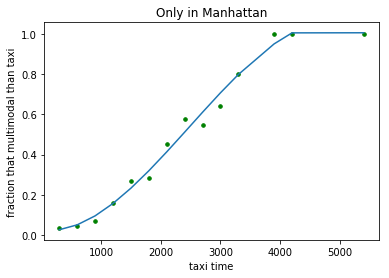

In [22]:
import matplotlib.pyplot as plt
data2=pd.DataFrame(columns = ['taxi time','proportion'])
for i in range(18):
    temp=manha[(manha.taxitime>300*i)&(manha.taxitime<300*i+300)]
    temp1=temp[temp.mduration<temp.taxitime]
    (x1,y1)=temp.shape
    (x2,y2)=temp1.shape
    if (x1!=0)&(x2!=0):
        proportion=x2/(x1)
        print('x1:'+str(x1))
        #print(proportion)
        data2=data2.append({'taxi time': 300*i+300,'proportion': proportion},ignore_index=True)
tt=np.array(data2['taxi time'])
pp=np.array(data2['proportion'])
s=50
plt.scatter(tt,pp, s, c="g", alpha=1, marker='.')
poly_deg = 3
coefs = np.polyfit(tt, pp, poly_deg)
y_poly = np.polyval(coefs, tt)
#plt.scatter(bt,bp, s, c="g", alpha=0.5, marker='.')
plt.plot(tt,y_poly)
plt.xlabel('taxi time')
plt.ylabel('fraction that multimodal than taxi')
plt.title('Only in Manhattan')
#plt.savefig('fractions in Manhattan',dpi=1000)

In [51]:
man=pd.read_csv('taxi _zone_lookup.csv')
man1=man[man.Borough=='Manhattan']
brook=man[man.Borough=='Brooklyn']
man.LocationID
manha=pd.DataFrame()
for i in man1.LocationID:
    for j in brook.LocationID:
        print(str(i)+":"+str(j))
        if i !=j:
            try:
                manha=manha.append(multimodaltime1.loc[i,j])
            except:
                print(str(i)+":"+str(j))
                
x=np.array(manha['taxitime'])
y=np.array(manha['mduration'])
#z=np.multiply(y,1.1)    
s=3
plt.scatter(x, y, s, c="b", alpha=1, marker='+')
#plt.plot(y,z,c='r',linestyle=':')
plt.plot(y,y,c='r',linestyle=':')
plt.xlabel('taxi time')
plt.ylabel('subway+bike+walking time')
plt.title('manhattan to brooklyn')
plt.savefig('manhattan to brooklyn')

4:11
4:11
4:14
4:14
4:17
4:17
4:21
4:21
4:22
4:22
4:25
4:25
4:26
4:26
4:29
4:29
4:33
4:33
4:34
4:34
4:35
4:35
4:36
4:36
4:37
4:37
4:39
4:39
4:40
4:40
4:49
4:49
4:52
4:52
4:54
4:54
4:55
4:55
4:61
4:61
4:62
4:62
4:63
4:63
4:65
4:65
4:66
4:66
4:67
4:67
4:71
4:71
4:72
4:72
4:76
4:76
4:77
4:77
4:80
4:80
4:85
4:85
4:89
4:89
4:91
4:91
4:97
4:97
4:106
4:106
4:108
4:108
4:111
4:111
4:112
4:112
4:123
4:123
4:133
4:133
4:149
4:149
4:150
4:150
4:154
4:154
4:155
4:155
4:165
4:165
4:177
4:177
4:178
4:178
4:181
4:181
4:188
4:188
4:189
4:189
4:190
4:190
4:195
4:195
4:210
4:210
4:217
4:217
4:222
4:222
4:225
4:225
4:227
4:227
4:228
4:228
4:255
4:255
4:256
4:256
4:257
4:257
12:11
12:11
12:14
12:14
12:17
12:17
12:21
12:21
12:22
12:22
12:25
12:25
12:26
12:26
12:29
12:29
12:33
12:33
12:34
12:34
12:35
12:35
12:36
12:36
12:37
12:37
12:39
12:39
12:40
12:40
12:49
12:49
12:52
12:52
12:54
12:54
12:55
12:55
12:61
12:61
12:62
12:62
12:63
12:63
12:65
12:65
12:66
12:66
12:67
12:67
12:71
12:71
12:72
12:72
12:76
12:76


88:34
88:35
88:35
88:36
88:36
88:37
88:37
88:39
88:39
88:40
88:40
88:49
88:49
88:52
88:52
88:54
88:54
88:55
88:55
88:61
88:61
88:62
88:62
88:63
88:63
88:65
88:65
88:66
88:66
88:67
88:67
88:71
88:71
88:72
88:72
88:76
88:76
88:77
88:77
88:80
88:80
88:85
88:85
88:89
88:89
88:91
88:91
88:97
88:97
88:106
88:106
88:108
88:108
88:111
88:111
88:112
88:112
88:123
88:123
88:133
88:133
88:149
88:149
88:150
88:150
88:154
88:154
88:155
88:155
88:165
88:165
88:177
88:177
88:178
88:178
88:181
88:181
88:188
88:188
88:189
88:189
88:190
88:190
88:195
88:195
88:210
88:210
88:217
88:217
88:222
88:222
88:225
88:225
88:227
88:227
88:228
88:228
88:255
88:255
88:256
88:256
88:257
88:257
90:11
90:11
90:14
90:14
90:17
90:17
90:21
90:21
90:22
90:22
90:25
90:25
90:26
90:26
90:29
90:29
90:33
90:33
90:34
90:34
90:35
90:35
90:36
90:36
90:37
90:37
90:39
90:39
90:40
90:40
90:49
90:49
90:52
90:52
90:54
90:54
90:55
90:55
90:61
90:61
90:62
90:62
90:63
90:63
90:65
90:65
90:66
90:66
90:67
90:67
90:71
90:71
90:72
90:72
90:7

127:76
127:77
127:77
127:80
127:80
127:85
127:85
127:89
127:89
127:91
127:91
127:97
127:97
127:106
127:106
127:108
127:108
127:111
127:111
127:112
127:112
127:123
127:123
127:133
127:133
127:149
127:149
127:150
127:150
127:154
127:154
127:155
127:155
127:165
127:165
127:177
127:177
127:178
127:178
127:181
127:181
127:188
127:188
127:189
127:189
127:190
127:190
127:195
127:195
127:210
127:210
127:217
127:217
127:222
127:222
127:225
127:225
127:227
127:227
127:228
127:228
127:255
127:255
127:256
127:256
127:257
127:257
128:11
128:11
128:14
128:14
128:17
128:17
128:21
128:21
128:22
128:22
128:25
128:25
128:26
128:26
128:29
128:29
128:33
128:33
128:34
128:34
128:35
128:35
128:36
128:36
128:37
128:37
128:39
128:39
128:40
128:40
128:49
128:49
128:52
128:52
128:54
128:54
128:55
128:55
128:61
128:61
128:62
128:62
128:63
128:63
128:65
128:65
128:66
128:66
128:67
128:67
128:71
128:71
128:72
128:72
128:76
128:76
128:77
128:77
128:80
128:80
128:85
128:85
128:89
128:89
128:91
128:91
128:97
128:97
1

158:177
158:177
158:178
158:178
158:181
158:181
158:188
158:188
158:189
158:189
158:190
158:190
158:195
158:195
158:210
158:210
158:217
158:217
158:222
158:222
158:225
158:225
158:227
158:227
158:228
158:228
158:255
158:255
158:256
158:256
158:257
158:257
161:11
161:11
161:14
161:14
161:17
161:17
161:21
161:21
161:22
161:22
161:25
161:25
161:26
161:26
161:29
161:29
161:33
161:33
161:34
161:34
161:35
161:35
161:36
161:36
161:37
161:37
161:39
161:39
161:40
161:40
161:49
161:49
161:52
161:52
161:54
161:54
161:55
161:55
161:61
161:61
161:62
161:62
161:63
161:63
161:65
161:65
161:66
161:66
161:67
161:67
161:71
161:71
161:72
161:72
161:76
161:76
161:77
161:77
161:80
161:80
161:85
161:85
161:89
161:89
161:91
161:91
161:97
161:97
161:106
161:106
161:108
161:108
161:111
161:111
161:112
161:112
161:123
161:123
161:133
161:133
161:149
161:149
161:150
161:150
161:154
161:154
161:155
161:155
161:165
161:165
161:177
161:177
161:178
161:178
161:181
161:181
161:188
161:188
161:189
161:189
161:190
161:

229:123
229:123
229:133
229:133
229:149
229:149
229:150
229:150
229:154
229:154
229:155
229:155
229:165
229:165
229:177
229:177
229:178
229:178
229:181
229:181
229:188
229:188
229:189
229:189
229:190
229:190
229:195
229:195
229:210
229:210
229:217
229:217
229:222
229:222
229:225
229:225
229:227
229:227
229:228
229:228
229:255
229:255
229:256
229:256
229:257
229:257
230:11
230:11
230:14
230:14
230:17
230:17
230:21
230:21
230:22
230:22
230:25
230:25
230:26
230:26
230:29
230:29
230:33
230:33
230:34
230:34
230:35
230:35
230:36
230:36
230:37
230:37
230:39
230:39
230:40
230:40
230:49
230:49
230:52
230:52
230:54
230:54
230:55
230:55
230:61
230:61
230:62
230:62
230:63
230:63
230:65
230:65
230:66
230:66
230:67
230:67
230:71
230:71
230:72
230:72
230:76
230:76
230:77
230:77
230:80
230:80
230:85
230:85
230:89
230:89
230:91
230:91
230:97
230:97
230:106
230:106
230:108
230:108
230:111
230:111
230:112
230:112
230:123
230:123
230:133
230:133
230:149
230:149
230:150
230:150
230:154
230:154
230:155
230:

246:61
246:62
246:62
246:63
246:63
246:65
246:65
246:66
246:66
246:67
246:67
246:71
246:71
246:72
246:72
246:76
246:76
246:77
246:77
246:80
246:80
246:85
246:85
246:89
246:89
246:91
246:91
246:97
246:97
246:106
246:106
246:108
246:108
246:111
246:111
246:112
246:112
246:123
246:123
246:133
246:133
246:149
246:149
246:150
246:150
246:154
246:154
246:155
246:155
246:165
246:165
246:177
246:177
246:178
246:178
246:181
246:181
246:188
246:188
246:189
246:189
246:190
246:190
246:195
246:195
246:210
246:210
246:217
246:217
246:222
246:222
246:225
246:225
246:227
246:227
246:228
246:228
246:255
246:255
246:256
246:256
246:257
246:257
249:11
249:11
249:14
249:14
249:17
249:17
249:21
249:21
249:22
249:22
249:25
249:25
249:26
249:26
249:29
249:29
249:33
249:33
249:34
249:34
249:35
249:35
249:36
249:36
249:37
249:37
249:39
249:39
249:40
249:40
249:49
249:49
249:52
249:52
249:54
249:54
249:55
249:55
249:61
249:61
249:62
249:62
249:63
249:63
249:65
249:65
249:66
249:66
249:67
249:67
249:71
249:71
2

KeyError: 'taxitime'

In [11]:
man=pd.read_csv('taxi _zone_lookup.csv')
man1=man[man.Borough=='Manhattan']
brook=man[man.Borough=='Brooklyn']
brook.LocationID


Series([], Name: LocationID, dtype: int64)

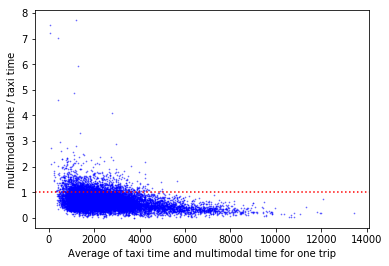

In [138]:
multimodaltime1=multimodaltime[(multimodaltime.taxitime<20000)&(multimodaltime.mduration<20000)]
y=np.array(multimodaltime1['taxitime'].divide(multimodaltime1['mduration']))
x=np.array(0.5*multimodaltime1['mduration']+0.5*multimodaltime1['mduration'])
s=2
plt.scatter(x, y, s, c="b", alpha=0.5, marker='.')
plt.axhline(y=1, color='r', linestyle=':')
plt.xlabel('Average of taxi time and multimodal time for one trip')
plt.ylabel('multimodal time / taxi time')
plt.savefig('ratio')

In [126]:
multimodaltime1['mduration']
#multimodaltime1['taxitime'].divide(multimodaltime1['mduration'])

PUloc  DOloc
1.0    1.0         0.0
3.0    18.0     3345.0
       254.0    1485.0
4.0    4.0         0.0
       7.0      2404.0
       12.0     1442.0
       13.0     1578.0
       14.0     3077.0
       17.0     2362.0
       21.0     2851.5
       22.0     2950.5
       24.0     1747.0
       25.0     1560.0
       29.0     3067.5
       33.0     1630.0
       34.0     1887.0
       36.0     2244.0
       37.0     1878.0
       40.0     1653.0
       41.0     2123.0
       42.0     2015.0
       43.0     1934.0
       45.0     1087.0
       48.0      916.0
       49.0     1820.0
       50.0     1549.0
       52.0     1545.0
       54.0     2181.0
       56.0     2684.0
       60.0     2907.0
                 ...  
263.0  261.0    2092.0
       262.0     969.0
       263.0       0.0
       265.0    1738.0
264.0  264.0       0.0
265.0  5.0      5487.0
       10.0     5795.0
       48.0     1192.0
       89.0     2328.0
       92.0     3291.0
       100.0     794.0
       101.0    8227.

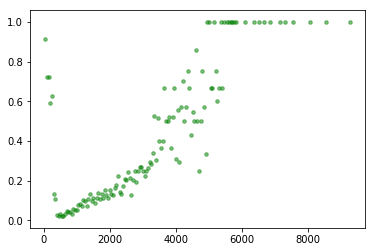

In [61]:
data2=pd.DataFrame(columns = ['taxi time','proportion'])
for i in range(200):
    temp=multimodaltime1[(multimodaltime1.taxitime>50*i)&(multimodaltime1.taxitime<50*i+50)]
    temp1=temp[temp.mduration<temp.taxitime]
    (x1,y1)=temp.shape
    (x2,y2)=temp1.shape
    if (x1!=0)&(x2!=0):
        proportion=x2/(x1)
        #print(proportion)
        data2=data2.append({'taxi time': 50*i+50,'proportion': proportion},ignore_index=True)
tt=np.array(data2['taxi time'])
pp=np.array(data2['proportion'])
s=50
plt.scatter(tt,pp, s, c="g", alpha=0.5, marker='.')

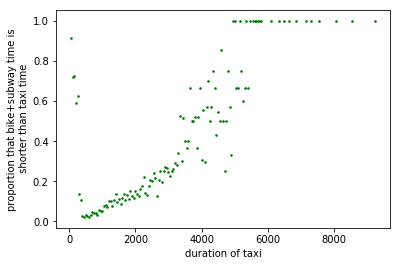

In [139]:
poly_deg = 8
coefs = np.polyfit(tt, pp, poly_deg)
y_poly = np.polyval(coefs, tt)
s=10
plt.scatter(tt,pp, s, c="g", alpha=1, marker='.')
s=40
#plt.plot(tt,y_poly)
plt.xlabel('duration of taxi')
plt.ylabel('proportion that bike+subway time is\n shorter than taxi time')
plt.savefig('proportion',pad_inches=50)

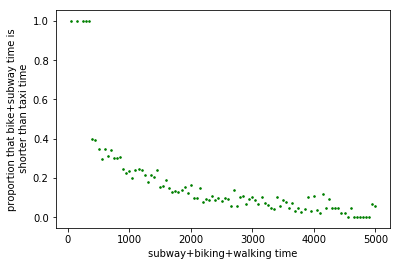

In [140]:
s=10
data3=pd.DataFrame(columns = ['subway+bike time','proportion'])
for i in range(100):
    temp=multimodaltime1[(multimodaltime1.mduration>50*i)&(multimodaltime1.mduration<50*i+50)]
    temp1=temp[temp.mduration<temp.taxitime]
    (x1,y1)=temp.shape
    (x2,y2)=temp1.shape
    if x1!=0 :
        proportion=x2/x1
        data3=data3.append({'bike time': 50*i+50,'proportion': proportion},ignore_index=True)
bt=np.array(data3['bike time'])
bp=np.array(data3['proportion'])
plt.scatter(bt,bp, s, c="g", alpha=1, marker='.')
plt.xlabel('subway+biking+walking time')
plt.ylabel('proportion that bike+subway time is\n shorter than taxi time')
plt.savefig('proportion1',pad_inches=50)

Text(0,0.5,'the proportion that bike time is shorter than taxi time')

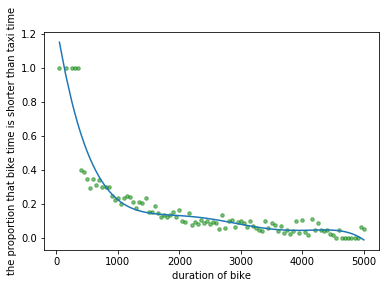

In [63]:
poly_deg = 5
coefs = np.polyfit(bt, bp, poly_deg)
y_poly = np.polyval(coefs, bt)
plt.scatter(bt,bp, s, c="g", alpha=0.5, marker='.')
plt.plot(bt,y_poly)
plt.xlabel('duration of bike')
plt.ylabel('the proportion that bike time is shorter than taxi time')

In [37]:
#check the subway and subway + bike

onlysubway=pd.read_csv('only-subway-time.csv',header=None)
onlysubway=pd.DataFrame(onlysubway.values,columns=['PUloc','DOloc','subwaytime'])
onlysubway=onlysubway.set_index(['PUloc','DOloc'])

In [38]:
onlysubway

subwaytime
PUloc DOloc            
3.0   18.0       3780.0
      254.0      1485.0
4.0   7.0        2924.0
      12.0       1931.0
      13.0       2073.0
      14.0       3581.0
      17.0       2474.0
      21.0       3495.0
      22.0       3594.0
      24.0       2518.0
      25.0       2177.0
      29.0       3789.0
      33.0       2156.0
      34.0       2709.0
      36.0       2495.0
      37.0       2366.0
      40.0       2157.0
      41.0       2801.0
      42.0       2828.0
      43.0       2423.0
      45.0       1606.0
      48.0       1404.0
      49.0       1935.0
      50.0       2301.0
      52.0       2100.0
      54.0       2685.0
      56.0       3063.0
      60.0       3424.0
      61.0       3021.0
      62.0       3021.0
...                 ...
263.0 255.0      1885.0
      256.0      2109.0
      259.0      3480.0
      260.0      1923.0
      261.0      2092.0
      262.0      1092.0
      265.0      1931.0
265.0 10.0       6076.0
      48.0       1192.0
      89.0       2432.0
      92.0       3512.0
      100.0      1075.0
      101.0      8508.0
      113.0       408.0
      130.0      4068.0
      135.0      5161.0
      138.0      5380.0
      140.0      1686.0
      141.0      1686.0
      161.0      1144.0
      164.0       946.0
      170.0      1505.0
      180.0      2582.0
      186.0      1197.0
      216.0      4343.0
      230.0      1108.0
      231.0       975.0
      240.0      4375.0
      244.0      2181.0
      257.0      2503.0

[14699 rows x 1 columns]

In [69]:
for (i,j) in onlysubway.index:
    onlysubway.loc[(i,j),'subway+bike']=multimodaltime.loc[(i,j),'mduration']
    onlysubway.loc[(i,j),'taxitime']=data.loc[(i,j),'duration']

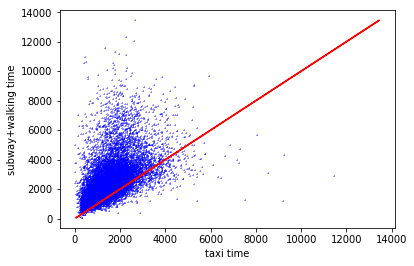

In [79]:
onlysubway=onlysubway[(onlysubway.taxitime<20000)&(onlysubway.subwaytime<20000)]
x=np.array(onlysubway['taxitime'])
y=np.array(onlysubway['subwaytime'])
s=1
plt.scatter(x, y, s, c="b", alpha=0.5, marker='+')
plt.plot(y,y,c='r')
plt.xlabel('taxi time')
plt.ylabel('subway+walking time')
plt.savefig('subway+walkingtime')

In [73]:
onlysubway

subwaytime  subway+bike     taxitime
PUloc DOloc                                      
3.0   18.0       3780.0       3345.0  1726.000000
      254.0      1485.0       1485.0   328.000000
4.0   7.0        2924.0       2404.0  1423.000000
      12.0       1931.0       1442.0   529.000000
      13.0       2073.0       1578.0   749.000000
      14.0       3581.0       3077.0  2268.000000
      17.0       2474.0       2362.0  1282.000000
      21.0       3495.0       2851.5  1373.000000
      22.0       3594.0       2950.5  2324.000000
      24.0       2518.0       1747.0  2585.000000
      25.0       2177.0       1560.0  1198.500000
      29.0       3789.0       3067.5  3061.000000
      33.0       2156.0       1630.0  1014.000000
      34.0       2709.0       1887.0  1142.000000
      36.0       2495.0       2244.0  1477.000000
      37.0       2366.0       1878.0  1479.000000
      40.0       2157.0       1653.0  1332.000000
      41.0       2801.0       2123.0  1483.000000
      42.0       2828.0       2015.0  1273.000000
      43.0       2423.0       1934.0  1344.000000
      45.0       1606.0       1087.0   544.000000
      48.0       1404.0        916.0  1275.500000
      49.0       1935.0       1820.0  1371.000000
      50.0       2301.0       1549.0  1452.000000
      52.0       2100.0       1545.0  1692.000000
      54.0       2685.0       2181.0  1187.000000
      56.0       3063.0       2684.0  1692.000000
      60.0       3424.0       2907.0  2338.000000
      61.0       3021.0       2359.0  1387.500000
      62.0       3021.0       2359.0  2173.000000
...                 ...          ...          ...
263.0 255.0      1885.0       1885.0  1537.000000
      256.0      2109.0       2109.0  1304.000000
      259.0      3480.0       3330.0   973.000001
      260.0      1923.0       1923.0  1082.000000
      261.0      2092.0       2092.0  1171.000000
      262.0      1092.0        969.0   263.000000
      265.0      1931.0       1738.0  1469.000000
265.0 10.0       6076.0       5795.0   771.000000
      48.0       1192.0       1192.0   755.000000
      89.0       2432.0       2328.0  2971.000000
      92.0       3512.0       3291.0  3089.000000
      100.0      1075.0        794.0  1675.000000
      101.0      8508.0       8227.0   989.499999
      113.0       408.0        408.0   831.000000
      130.0      4068.0       3787.0  1512.500000
      135.0      5161.0       4940.0  1938.500000
      138.0      5380.0       5219.0  4126.000000
      140.0      1686.0       1553.0  3794.000000
      141.0      1686.0       1553.0  1766.000000
      161.0      1144.0       1090.0  1794.000000
      164.0       946.0        946.0   549.000000
      170.0      1505.0       1368.0   172.000000
      180.0      2582.0       2518.0  1095.000000
      186.0      1197.0       1114.0  5415.000000
      216.0      4343.0       4279.0  2750.000000
      230.0      1108.0       1083.0  1736.000000
      231.0       975.0        975.0   664.000000
      240.0      4375.0       4254.0   178.000000
      244.0      2181.0       1900.0  2398.000000
      257.0      2503.0       2503.0  2184.000000

[14688 rows x 3 columns]

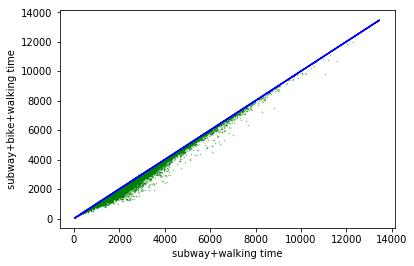

In [94]:
x=np.array(onlysubway['subwaytime'])
y=np.array(onlysubway['subway+bike'])
s=1
plt.scatter(x, y, s, c="g", alpha=0.5, marker='.')
plt.plot(y,y,c='b')
plt.xlabel('subway+walking time')
plt.ylabel('subway+bike+walking time')
plt.savefig('compare')

In [49]:
x.mean()



2610.9833321994693

In [50]:
y.mean()

2523.5574528879515

In [ ]:
data2=pd.DataFrame(columns = ['taxi time','proportion'])
for i in range(200):
    temp=multimodaltime1[(multimodaltime1.taxitime>50*i)&(multimodaltime1.taxitime<50*i+50)]
    temp1=temp[temp.mduration<temp.taxitime]
    (x1,y1)=temp.shape
    (x2,y2)=temp1.shape
    if (x1!=0)&(x2!=0):
        proportion=x2/(x1)
        #print(proportion)
        data2=data2.append({'taxi time': 50*i+50,'proportion': proportion},ignore_index=True)
tt=np.array(data2['taxi time'])
pp=np.array(data2['proportion'])
s=50
plt.scatter(tt,pp, s, c="g", alpha=0.5, marker='.')

In [17]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
FFMpegWriter = manimation.writers['ffmpeg']
writer = FFMpegWriter(fps=10)

def animate_traffic():
    fig=plt.figure(1)
    ax=fig.add_subplot(1,1,1)
    tsim=tstart
    with writer.saving(fig, "roadtest.mp4", 100):
        for i in range(100):
            draw_roadlayout()
            for car in cars:
                # draw each of the cars on the road
                # based on time tsim
                plt.grid(False)
                ax.axis(plt_area)
                fig   = plt.gcf()
                writer.grab_frame()
                ax.cla()
                tsim+=timestep
    plt.close(1) 

C:\Users\liumo15\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\liumo15\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\liumo15\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\liumo15\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\liumo15\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\liumo15\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\U

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd